In [1]:
# Import các thư viện cần thiết
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from collections import Counter
from IPython.display import display
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import os
import joblib
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")


In [2]:
saving_path = r"..\docs\sentiment_visualization"
os.makedirs(saving_path, exist_ok=True)
# Thiết lập kiểu hiển thị cho seaborn
sns.set(style="whitegrid")
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
platform_colors = ["#E1306C", "#1DA1F2", "#0866ff"]  # Instagram, Twitter, Facebook
sentiment_colors = ["#2ecc71", "#e74c3c", "#f1c40f"]  # Positive, Negative, Neutral
engagement_colors = ['#FF6B6B', '#1DB954'] # Likes, Retweets

In [3]:
df = pd.read_csv('../data/external/sentimentdataset.csv')
# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng đầu tiên của tập dữ liệu:")
display(df.head(5))
# Kiểm tra thông tin cơ bản của dữ liệu
df['Sentiment'] = df['Sentiment'].str.strip()
print(f"\n {len(df["Sentiment"].unique())} loại cảm xúc:")
print(df["Sentiment"].unique())

5 dòng đầu tiên của tập dữ liệu:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



 191 loại cảm xúc:
['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Con

In [4]:
# Chia dữ liệu vào các nhóm để phân tích
%run Split_Data.py
# Tải dữ liệu từ file CSV
df = pd.read_csv('../data/external/sentimentgroups.csv')

# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng đầu tiên của tập dữ liệu:")
display(df.head(300))

# Kiểm tra thông tin cơ bản của dữ liệu
print("\nThông tin dữ liệu:")
df.info()

# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

print("\n Các loại cảm xúc:")
print(df["Sentiment"].unique())

print("\n Độ dài dữ liệu")
print(len(df))

Đã chuyển đổi thành công và lưu kết quả vào ../data/external/sentimentgroups.csv
5 dòng đầu tiên của tập dữ liệu:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,300,"A playful escapade in the carnival of life, c...",Positive,2018-08-22 17:20:00,CarnivalDreamer,Facebook,#Playful #CarnivalEscapade,24.0,48.0,Australia,2018,8,22,17
296,297,301,"Drowning in the abyss of despair, a heart sha...",Negative,2021-09-15 16:00:00,ShatteredHeart,Instagram,#Despair #EchoingSilence,8.0,16.0,Canada,2021,9,15,16
297,298,302,"Bitterness festering like a venomous vine, en...",Negative,2019-03-08 14:20:00,VenomousSoul,Facebook,#Bitterness #ResentmentWeb,12.0,24.0,UK,2019,3,8,14
298,299,303,"Wandering through the desert of loneliness, e...",Negative,2017-07-20 11:45:00,DesertWanderer,Twitter,#Loneliness #MiragesOfConnection,15.0,30.0,USA,2017,7,20,11



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB

Số lượng giá trị thiếu trong mỗi cột:
Unnamed: 0.1    0
Unnamed: 0      0
Text  

In [5]:
# Loại bỏ cột không cần thiết
df.drop(columns=[col for col in df.columns if col.startswith('Unnamed:')]
        ,inplace=True)


# Chuyển đổi cột Timestamp thành kiểu datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
# Chuẩn hóa dữ liệu
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()
df['User'] = df['User'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()

# Tạo cột Engagement từ Likes và Retweets
df['Engagement'] = df['Likes']+df['Retweets']

print("Dữ liệu sau khi làm sạch:")
display(df.head(300))

Dữ liệu sau khi làm sạch:


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek,Engagement
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,6,45.0
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,6,15.0
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,6,60.0
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,6,23.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,6,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"A playful escapade in the carnival of life, c...",Positive,2018-08-22 17:20:00,CarnivalDreamer,Facebook,#Playful #CarnivalEscapade,24.0,48.0,Australia,2018,8,22,17,2,72.0
296,"Drowning in the abyss of despair, a heart sha...",Negative,2021-09-15 16:00:00,ShatteredHeart,Instagram,#Despair #EchoingSilence,8.0,16.0,Canada,2021,9,15,16,2,24.0
297,"Bitterness festering like a venomous vine, en...",Negative,2019-03-08 14:20:00,VenomousSoul,Facebook,#Bitterness #ResentmentWeb,12.0,24.0,UK,2019,3,8,14,4,36.0
298,"Wandering through the desert of loneliness, e...",Negative,2017-07-20 11:45:00,DesertWanderer,Twitter,#Loneliness #MiragesOfConnection,15.0,30.0,USA,2017,7,20,11,3,45.0


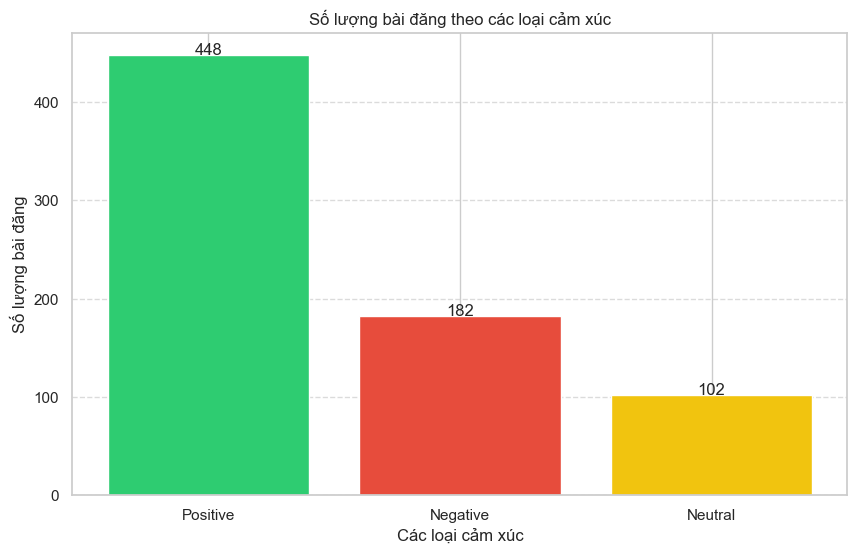

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng phân phối theo cảm xúc.png


In [6]:
# thực hiện lọc với danh sách ban đầu
positive_sentiments = ['Positive','Negative','Neutral']
positive_df = df[df['Sentiment'].isin(positive_sentiments)]

# Đếm số lượng bài đăng cho từng loại cảm xúc tích cực
positive_counts = positive_df['Sentiment'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ
plt.bar(positive_counts.index, positive_counts.values, color=sentiment_colors)  # Vẽ các cột với màu xanh nhạt

# Thêm nhãn và tiêu đề
plt.xlabel('Các loại cảm xúc')  # Nhãn trục x
plt.ylabel('Số lượng bài đăng')  # Nhãn trục y
plt.title('Số lượng bài đăng theo các loại cảm xúc')  # Tiêu đề biểu đồ

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=0)

# Thêm giá trị lên đầu mỗi cột
for i, value in enumerate(positive_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center')  # Hiển thị số lượng trên mỗi cột

# Thêm lưới cho trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng phân phối theo cảm xúc.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

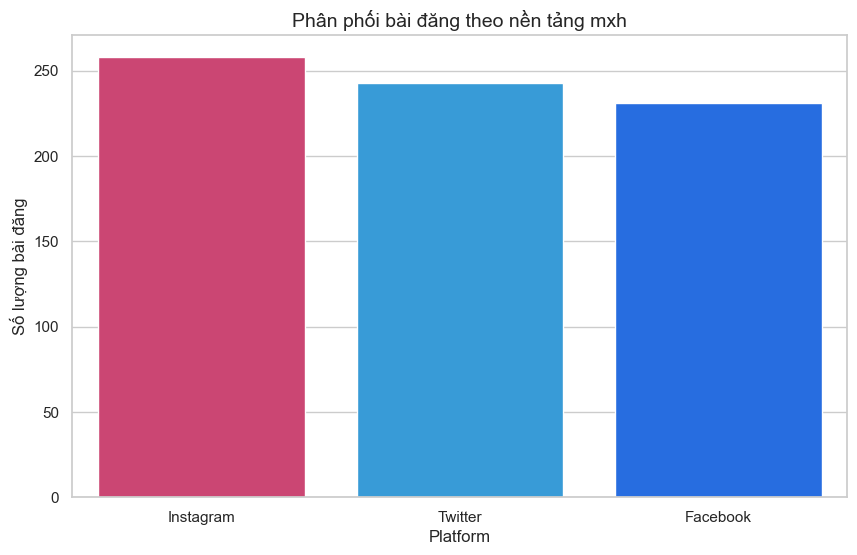

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng theo nền tảng mxh.png


In [7]:
# Đếm số lượng bài đăng theo Platform
platform_counts = df['Platform'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette=platform_colors)
plt.title('Phân phối bài đăng theo nền tảng mxh', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng theo nền tảng mxh.png


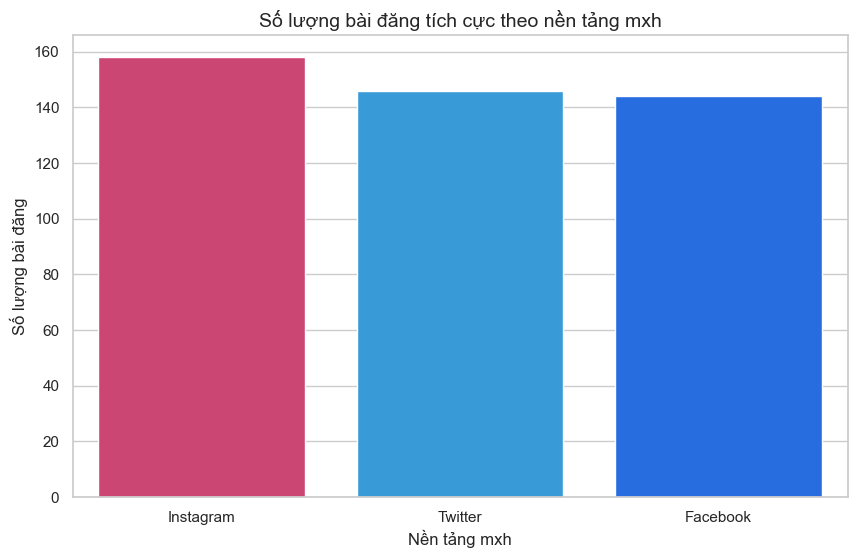

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng tích cực theo nền tảng mxh.png


In [8]:
print(f"Biểu đồ đã được lưu tại: {file_name}")
# Đếm số lượng bài đăng theo Platform
posts_per_platform = df[df["Sentiment"] == "Positive"]["Platform"].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_platform.index, y=posts_per_platform.values, palette=platform_colors)
plt.title('Số lượng bài đăng tích cực theo nền tảng mxh', fontsize=14)
plt.xlabel('Nền tảng mxh', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tích cực theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

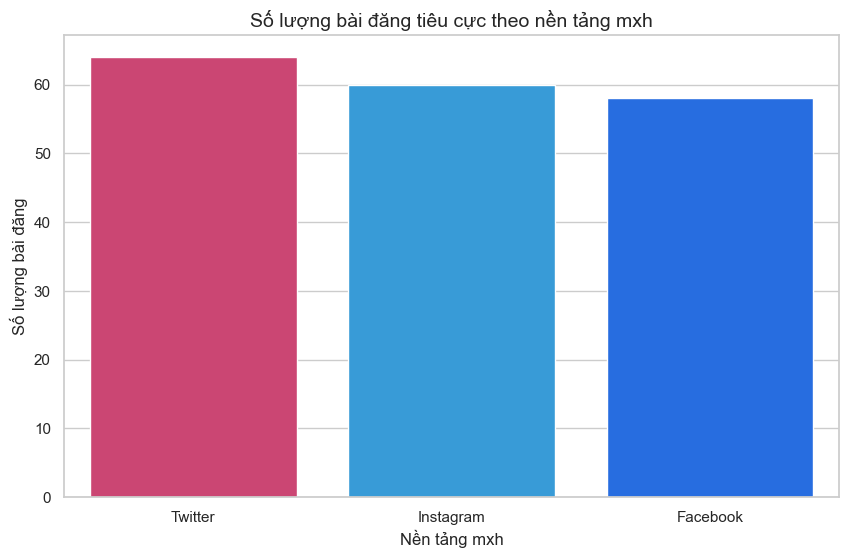

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng tiêu cực theo nền tảng mxh.png


In [9]:
# Đếm số lượng bài đăng theo Platform
posts_per_platform = df[df["Sentiment"] == "Negative"]["Platform"].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_platform.index, y=posts_per_platform.values,palette=platform_colors)
plt.title('Số lượng bài đăng tiêu cực theo nền tảng mxh', fontsize=14)
plt.xlabel('Nền tảng mxh', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tiêu cực theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

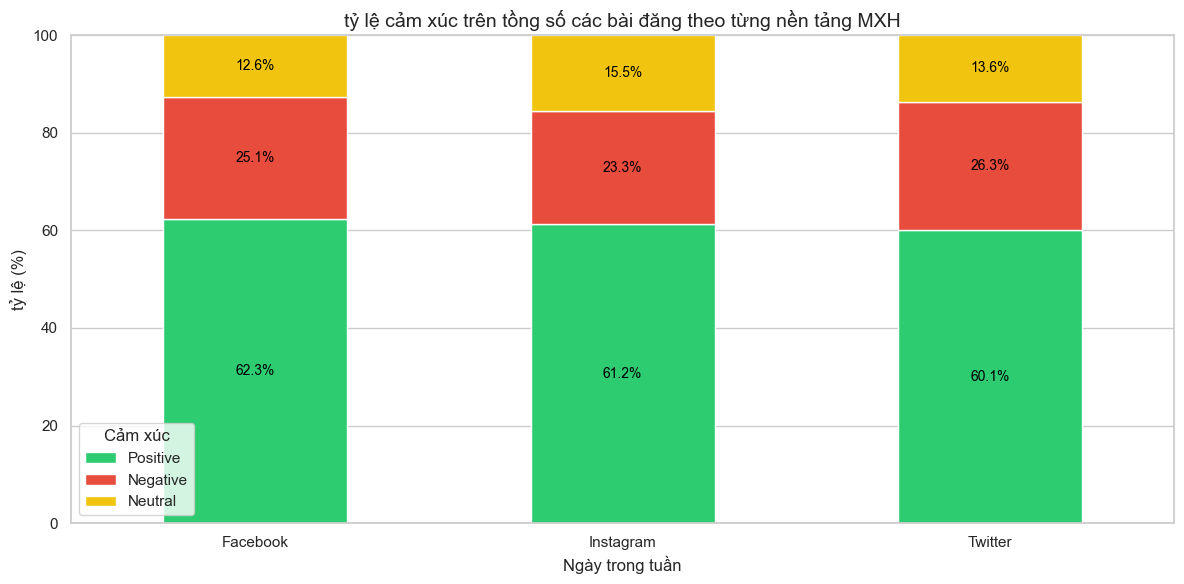

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ cảm xúc trên tồng số các bài đăng theo từng nền tảng MXH.png


In [10]:
# Tính số lượng từng loại cảm xúc theo nền tảng MXH
sentiment_counts = df.groupby(["Platform", "Sentiment"]).size().unstack(fill_value=0)

# Tính tỷ lệ cảm xúc (%) theo từng ngày
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_ratio = sentiment_ratio[["Positive", "Negative", "Neutral"]]  # Đảm bảo đúng thứ tự

# Vẽ biểu đồ cột chồng
ax = sentiment_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), color=sentiment_colors)

# Ghi tỷ lệ phần trăm lên từng phần
for i, country in enumerate(sentiment_ratio.index):
    cumulative = 0
    for j, sentiment in enumerate(sentiment_ratio.columns):
        value = sentiment_ratio.loc[country, sentiment]
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative += value

plt.title("tỷ lệ cảm xúc trên tồng số các bài đăng theo từng nền tảng MXH", fontsize=14)
plt.xlabel("Ngày trong tuần", fontsize=12)
plt.ylabel("tỷ lệ (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Cảm xúc", loc="lower left")
plt.ylim(0, 100)

# Lưu biểu đồ
file_name = os.path.join(saving_path, "tỷ lệ cảm xúc trên tồng số các bài đăng theo từng nền tảng MXH.png")
plt.tight_layout()
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

print(f"Biểu đồ đã được lưu tại: {file_name}")


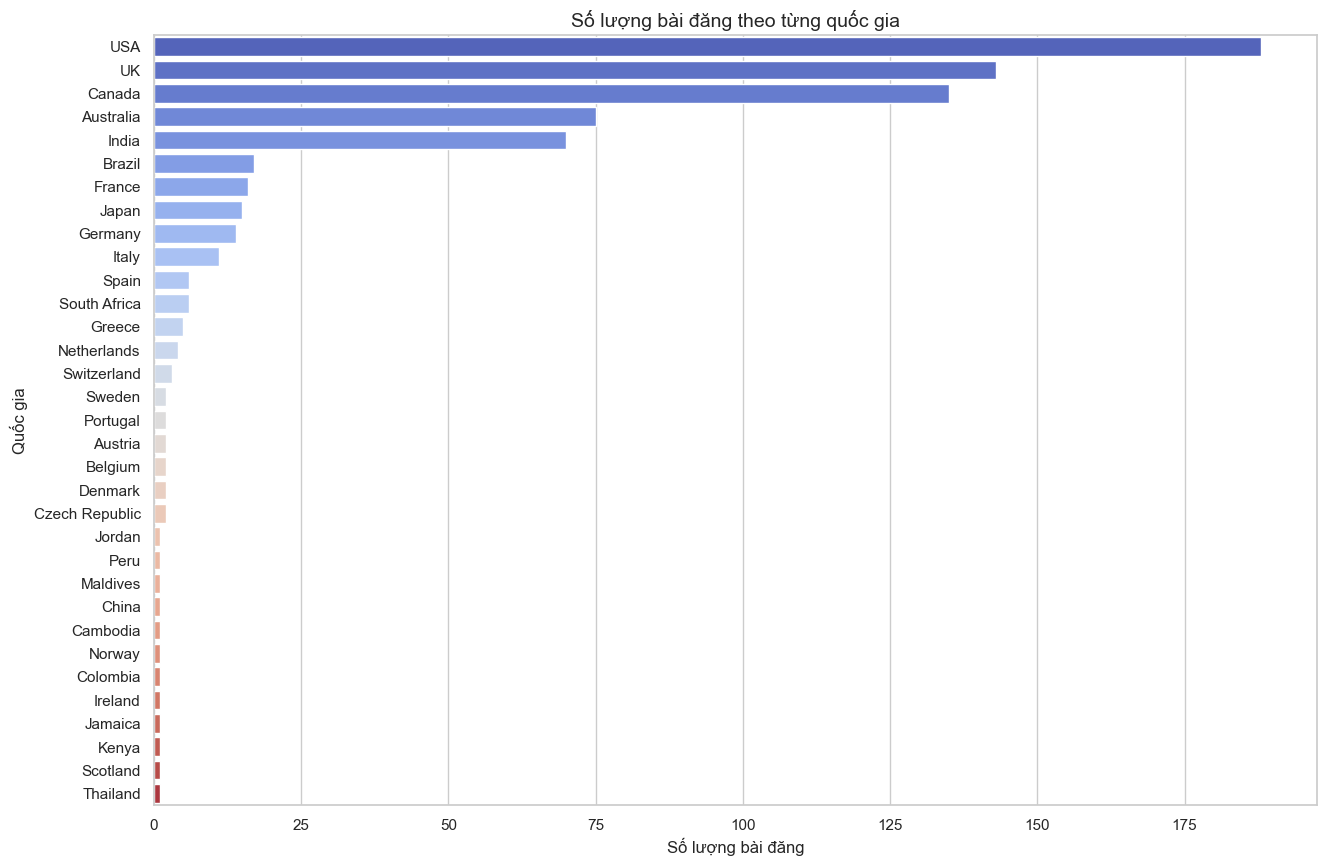

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng theo từng quốc gia.png


In [11]:
# Đếm số lượng bài đăng theo Country (lấy top 10)
country_counts = df['Country'].value_counts()
# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")
plt.title('Số lượng bài đăng theo từng quốc gia', fontsize=14)
plt.ylabel('Quốc gia', fontsize=12)
plt.xlabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo từng quốc gia.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

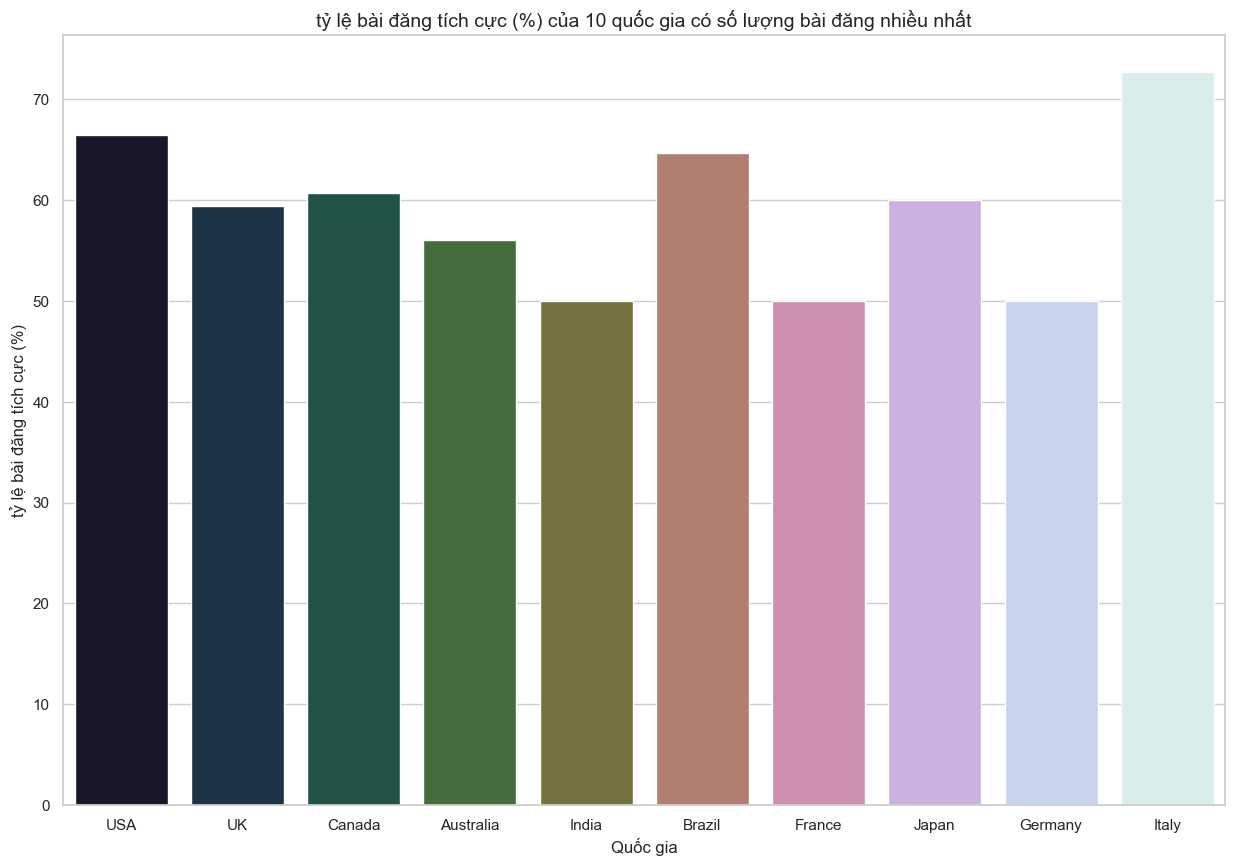

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ bài đăng tích cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png


In [12]:
# Lấy top 10 quốc gia có số lượng bài đăng nhiều nhất
top_10_total_posts = df["Country"].value_counts().head(10)

# Đếm số bài đăng Positive tương ứng với các quốc gia này
positive_counts_in_top_10 = df[df["Sentiment"] == "Positive"]["Country"].value_counts().reindex(top_10_total_posts.index, fill_value=0)

# Tính tỷ lệ Positive / Tổng bài đăng (%)
positive_ratio_top_10 = (positive_counts_in_top_10 / top_10_total_posts * 100)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(x=positive_ratio_top_10.index, y=positive_ratio_top_10.values, palette="cubehelix")
plt.title('tỷ lệ bài đăng tích cực (%) của 10 quốc gia có số lượng bài đăng nhiều nhất', fontsize=14)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('tỷ lệ bài đăng tích cực (%)', fontsize=12)

# Đường dẫn lưu hình ảnh
file_name = os.path.join(saving_path, "tỷ lệ bài đăng tích cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

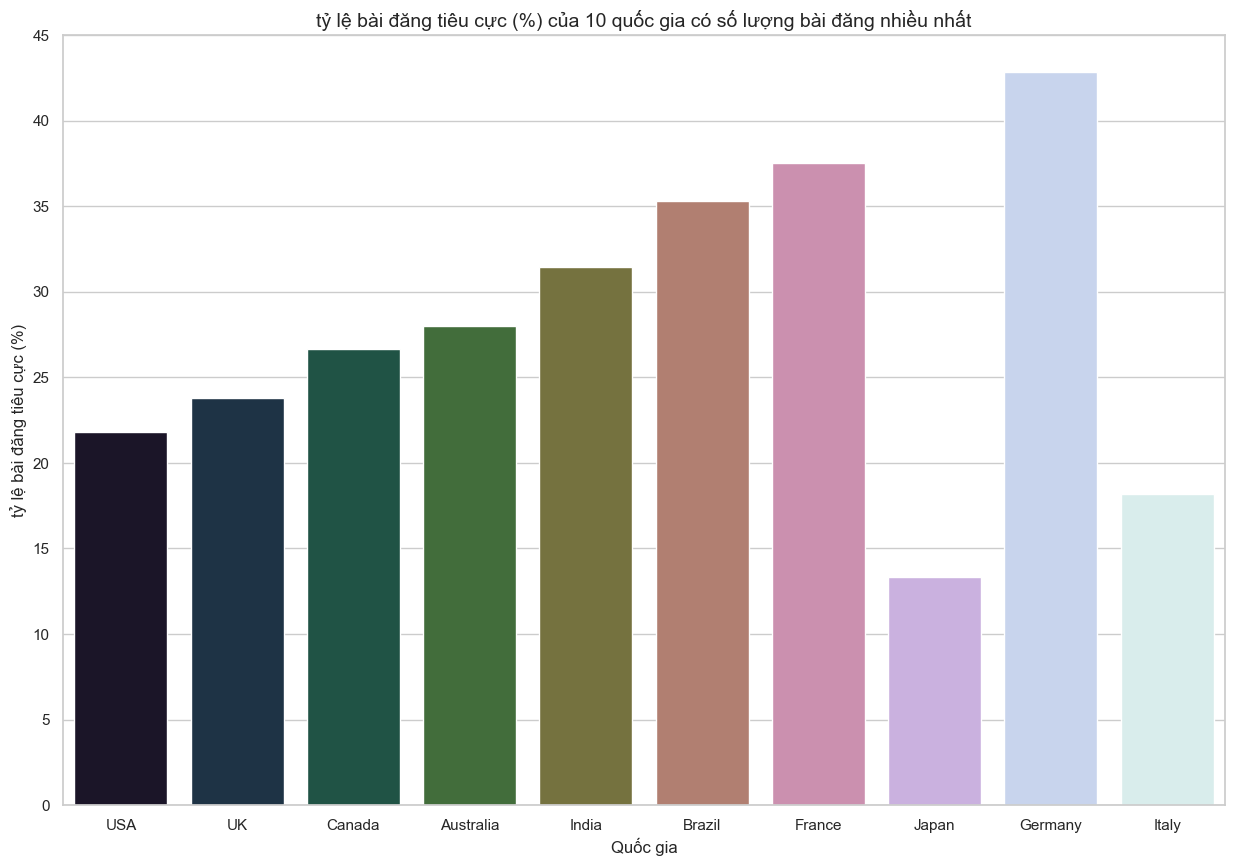

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ bài đăng tiêu cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png


In [13]:
# Lấy top 10 quốc gia có số lượng bài đăng nhiều nhất
top_10_total_posts = df["Country"].value_counts().head(10)

# Đếm số bài đăng Positive tương ứng với các quốc gia này
positive_counts_in_top_10 = df[df["Sentiment"] == "Negative"]["Country"].value_counts().reindex(top_10_total_posts.index, fill_value=0)

# Tính tỷ lệ Positive / Tổng bài đăng (%)
positive_ratio_top_10 = (positive_counts_in_top_10 / top_10_total_posts * 100)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(x=positive_ratio_top_10.index, y=positive_ratio_top_10.values, palette="cubehelix")
plt.title('tỷ lệ bài đăng tiêu cực (%) của 10 quốc gia có số lượng bài đăng nhiều nhất', fontsize=14)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('tỷ lệ bài đăng tiêu cực (%)', fontsize=12)

# Đường dẫn lưu hình ảnh
file_name = os.path.join(saving_path, "tỷ lệ bài đăng tiêu cực của 10 quốc gia có số lượng bài đăng nhiều nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

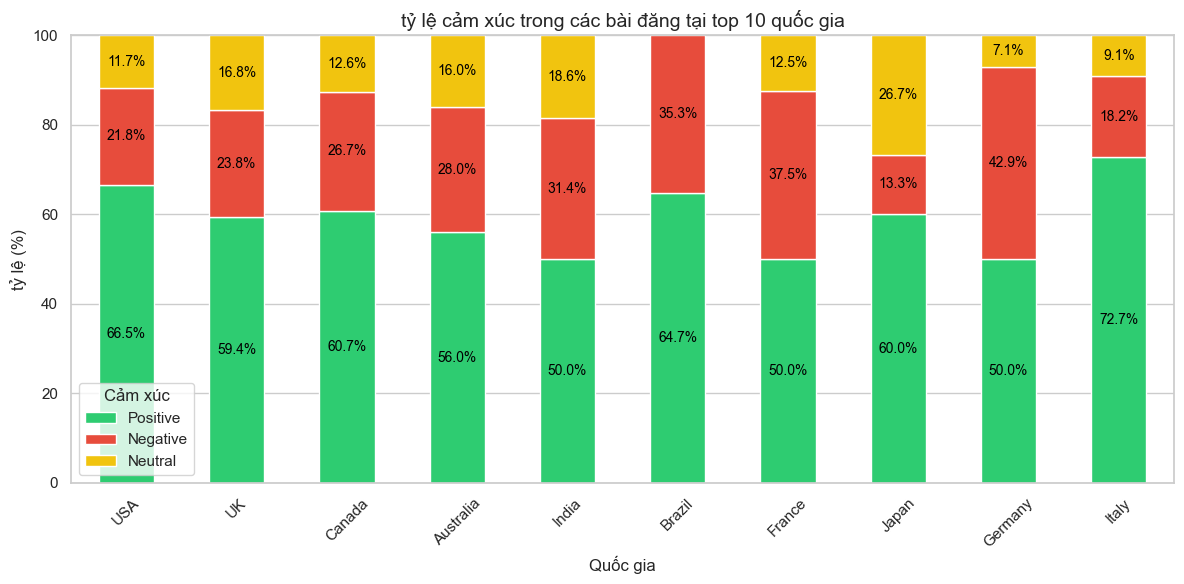

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ cảm xúc của 10 quốc gia có số bài đăng nhiêu nhất.png


In [14]:
# Lấy top 10 quốc gia có tổng số bài đăng nhiều nhất
top_10_countries = df["Country"].value_counts().head(10).index

# Lọc dữ liệu theo top 10 quốc gia
filtered_df = df[df["Country"].isin(top_10_countries)]

# Tính số lượng từng loại cảm xúc theo quốc gia
sentiment_counts = filtered_df.groupby(["Country", "Sentiment"]).size().unstack(fill_value=0).reindex(top_10_total_posts.index, fill_value=0)

# Tính tỷ lệ cảm xúc (%) theo từng quốc gia
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_ratio = sentiment_ratio[["Positive", "Negative", "Neutral"]]  # Đảm bảo đúng thứ tự

# Vẽ biểu đồ cột chồng
ax = sentiment_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), color=sentiment_colors)

# Ghi tỷ lệ phần trăm lên từng phần
for i, country in enumerate(sentiment_ratio.index):
    cumulative = 0
    for j, sentiment in enumerate(sentiment_ratio.columns):
        value = sentiment_ratio.loc[country, sentiment]
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative += value

plt.title("tỷ lệ cảm xúc trong các bài đăng tại top 10 quốc gia", fontsize=14)
plt.xlabel("Quốc gia", fontsize=12)
plt.ylabel("tỷ lệ (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Cảm xúc", loc="lower left")
plt.ylim(0, 100)

# Lưu biểu đồ
file_name = os.path.join(saving_path, "tỷ lệ cảm xúc của 10 quốc gia có số bài đăng nhiêu nhất.png")
plt.tight_layout()
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

print(f"Biểu đồ đã được lưu tại: {file_name}")


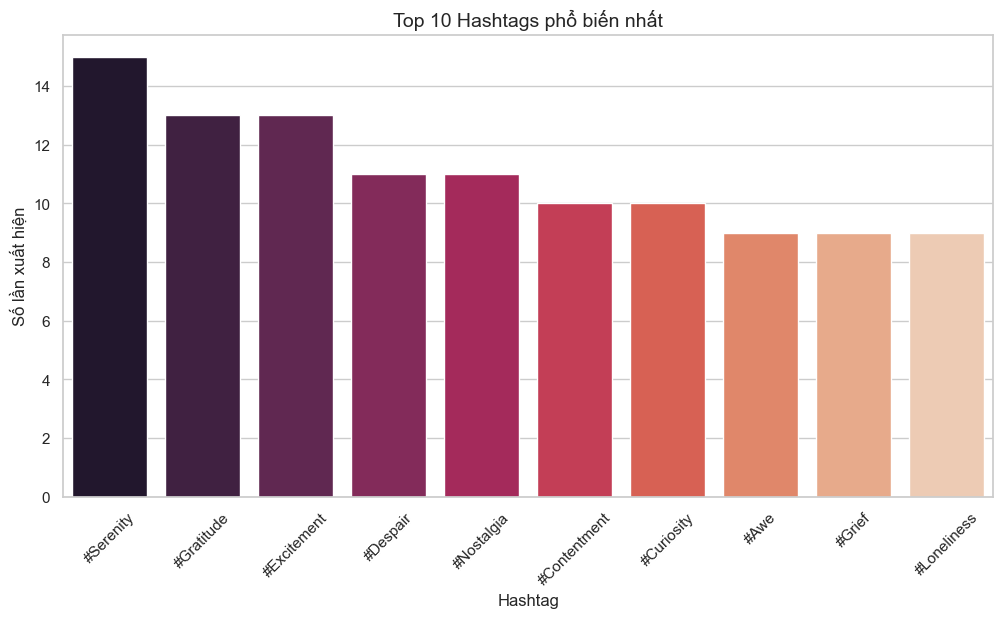

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\top 10 hashtags phổ biết nhất.png


In [15]:
# Tách và đếm các hashtag
all_hashtags = df['Hashtags'].str.split().sum()
hashtag_counts = Counter(all_hashtags)
most_common_hashtags = hashtag_counts.most_common(10)

# Chuẩn bị dữ liệu để vẽ biểu đồ
hashtags, counts = zip(*most_common_hashtags)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=list(hashtags), y=list(counts), palette="rocket")
plt.title('Top 10 Hashtags phổ biến nhất', fontsize=14)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Số lần xuất hiện', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 hashtags phổ biết nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

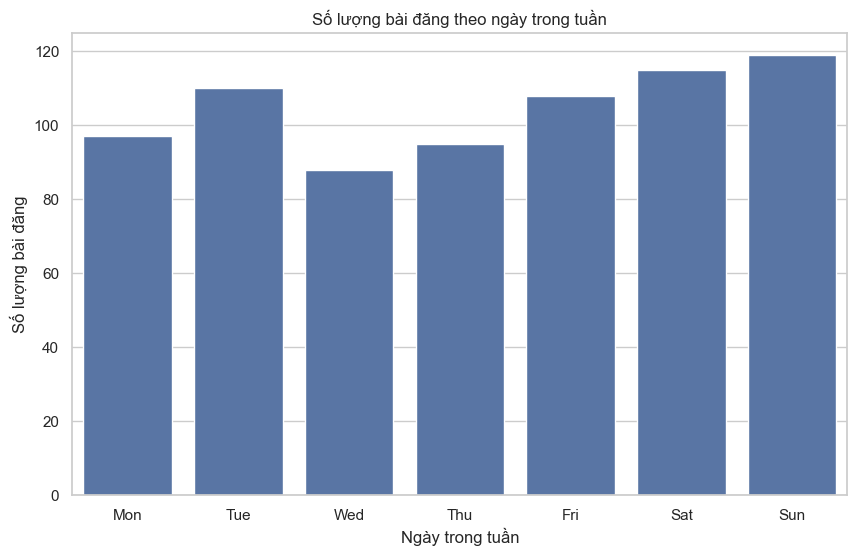

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng theo ngày trong tuần.png


In [16]:
posts_per_day = df['DayOfWeek'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=days, y=posts_per_day.values)
plt.title('Số lượng bài đăng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng bài đăng')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

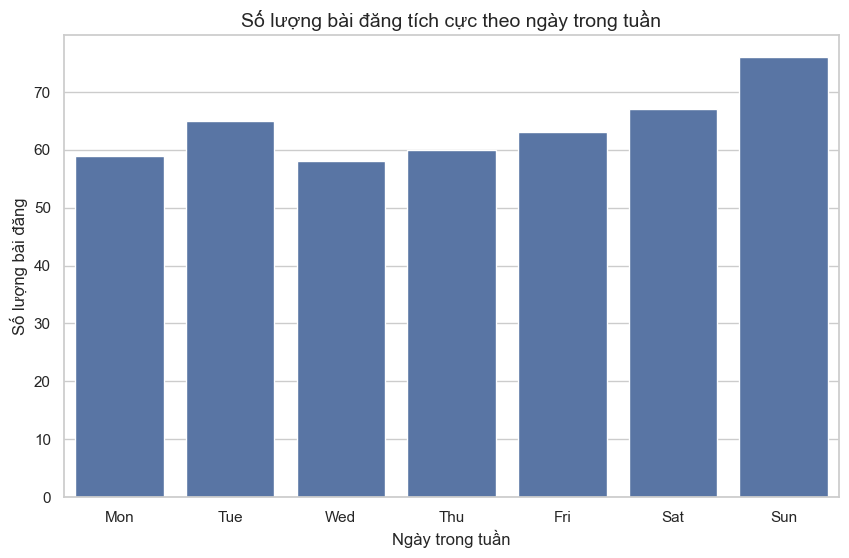

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng tích cực theo ngày trong tuần.png


In [17]:
# Đếm số lượng bài đăng theo Platform
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day_positive = df[df["Sentiment"] == "Positive"]["DayOfWeek"].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=posts_per_day_positive.values)
plt.title('Số lượng bài đăng tích cực theo ngày trong tuần', fontsize=14)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tích cực theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

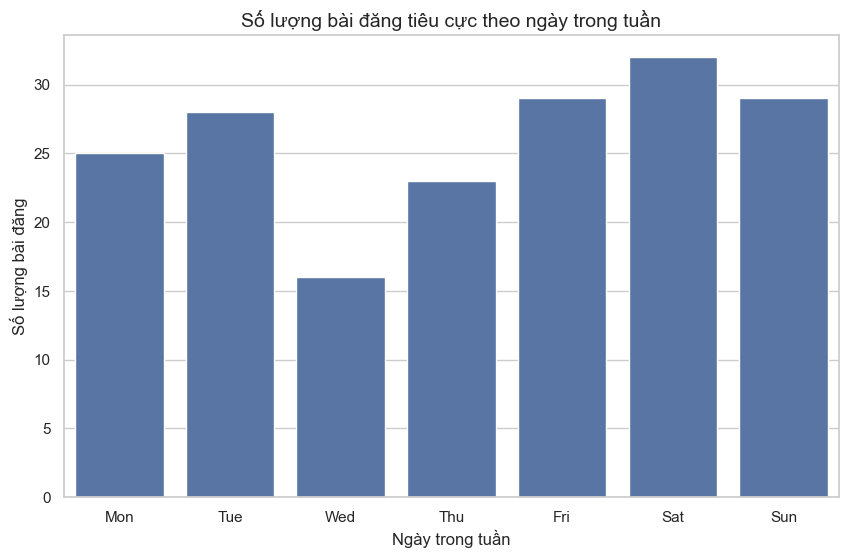

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng tiêu cực theo ngày trong tuần.png


In [18]:
# Đếm số lượng bài đăng theo Platform
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day_negative = df[df["Sentiment"] == "Negative"]["DayOfWeek"].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=posts_per_day_negative.values)
plt.title('Số lượng bài đăng tiêu cực theo ngày trong tuần', fontsize=14)
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng tiêu cực theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

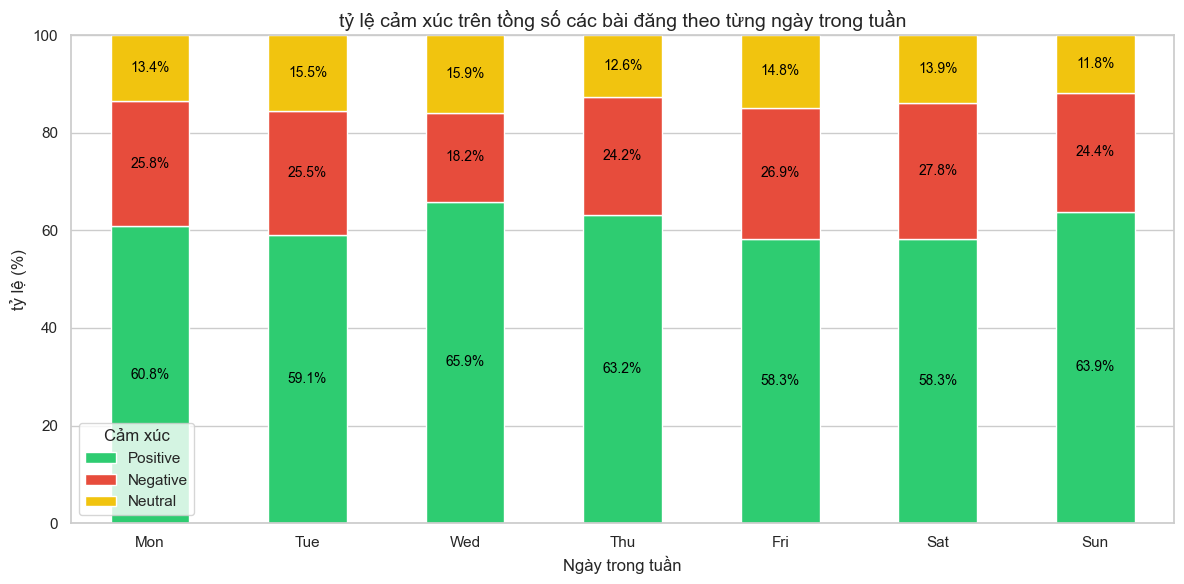

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ cảm xúc trên tồng số các bài đăng theo từng ngày trong tuần.png


In [19]:
# Lấy số lượng bài dđăng các ngày trong tuần
posts_per_day = df["DayOfWeek"].value_counts().sort_index()

# Tính số lượng từng loại cảm xúc theo ngày
sentiment_counts = df.groupby(["DayOfWeek", "Sentiment"]).size().unstack(fill_value=0)

# Tính tỷ lệ cảm xúc (%) theo từng ngày
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_ratio = sentiment_ratio[["Positive", "Negative", "Neutral"]]  # Đảm bảo đúng thứ tự

# Vẽ biểu đồ cột chồng
ax = sentiment_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), color=sentiment_colors)

# Ghi tỷ lệ phần trăm lên từng phần
for i, country in enumerate(sentiment_ratio.index):
    cumulative = 0
    for j, sentiment in enumerate(sentiment_ratio.columns):
        value = sentiment_ratio.loc[country, sentiment]
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative += value

plt.title("tỷ lệ cảm xúc trên tồng số các bài đăng theo từng ngày trong tuần", fontsize=14)
plt.xlabel("Ngày trong tuần", fontsize=12)
plt.ylabel("tỷ lệ (%)", fontsize=12)
plt.xticks(ticks=range(7), labels=days, rotation=0)
plt.legend(title="Cảm xúc", loc="lower left")
plt.ylim(0, 100)

# Lưu biểu đồ
file_name = os.path.join(saving_path, "tỷ lệ cảm xúc trên tồng số các bài đăng theo từng ngày trong tuần.png")
plt.tight_layout()
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

print(f"Biểu đồ đã được lưu tại: {file_name}")


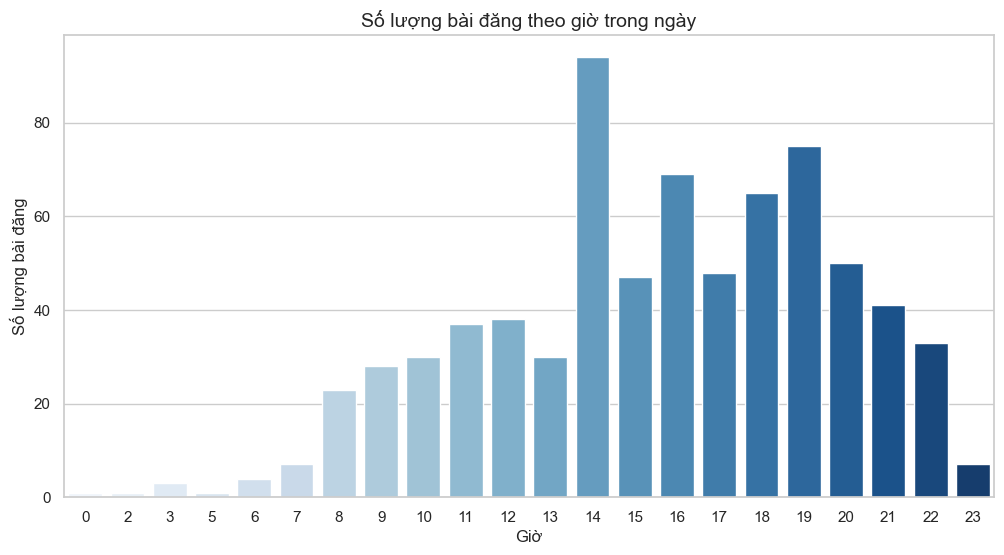

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\số lượng bài đăng theo giờ trong ngày.png


In [20]:
# Tạo cột Date từ Timestamp
df['Date'] = df['Timestamp'].dt.date

# Đếm số bài đăng theo ngày
posts_per_day = df.groupby('Date').size()
# Đếm số bài đăng theo giờ
df['Hour'] = df['Timestamp'].dt.hour
posts_per_hour = df.groupby('Hour').size()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, palette="Blues")
plt.title('Số lượng bài đăng theo giờ trong ngày', fontsize=14)
plt.xlabel('Giờ', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo giờ trong ngày.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

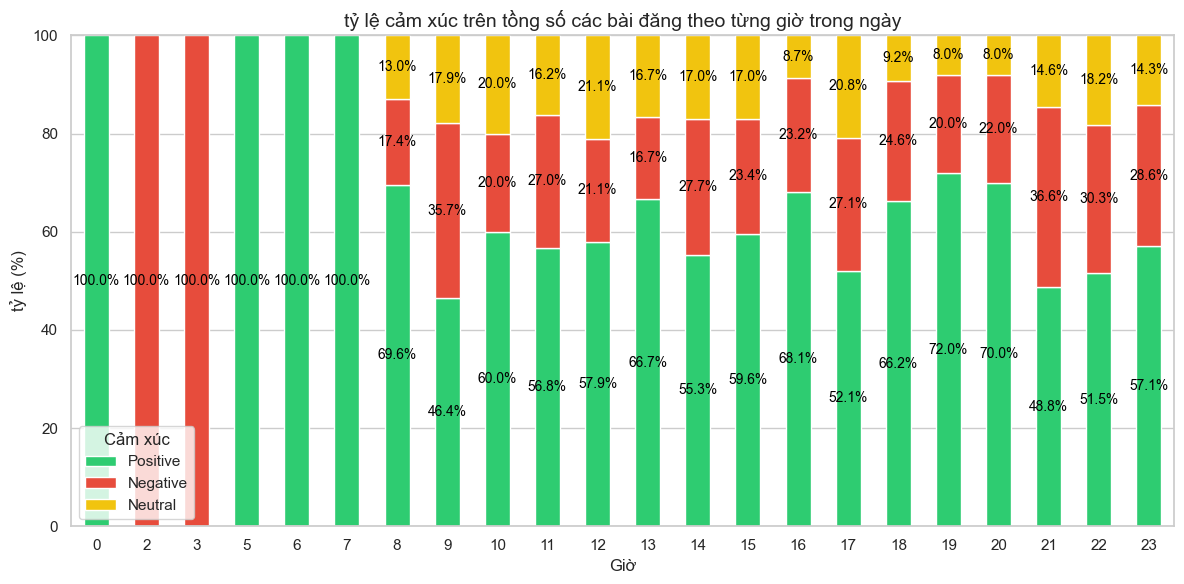

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tỷ lệ cảm xúc trên tồng số các bài đăng theo từng giờ trong ngày.png


In [21]:
# Tính số lượng từng loại cảm xúc theo giờ
sentiment_counts = df.groupby(["Hour", "Sentiment"]).size().unstack(fill_value=0)

# Tính tỷ lệ cảm xúc (%) theo từng ngày
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_ratio = sentiment_ratio[["Positive", "Negative", "Neutral"]]  # Đảm bảo đúng thứ tự

# Vẽ biểu đồ cột chồng
ax = sentiment_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), color=sentiment_colors)

# Ghi tỷ lệ phần trăm lên từng phần
for i, country in enumerate(sentiment_ratio.index):
    cumulative = 0
    for j, sentiment in enumerate(sentiment_ratio.columns):
        value = sentiment_ratio.loc[country, sentiment]
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative += value

plt.title("tỷ lệ cảm xúc trên tồng số các bài đăng theo từng giờ trong ngày", fontsize=14)
plt.xlabel("Giờ", fontsize=12)
plt.ylabel("tỷ lệ (%)", fontsize=12)
plt.legend(title="Cảm xúc", loc="lower left")
plt.ylim(0, 100)
plt.xticks(rotation=0)
# Lưu biểu đồ
file_name = os.path.join(saving_path, "tỷ lệ cảm xúc trên tồng số các bài đăng theo từng giờ trong ngày.png")
plt.tight_layout()
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

print(f"Biểu đồ đã được lưu tại: {file_name}")


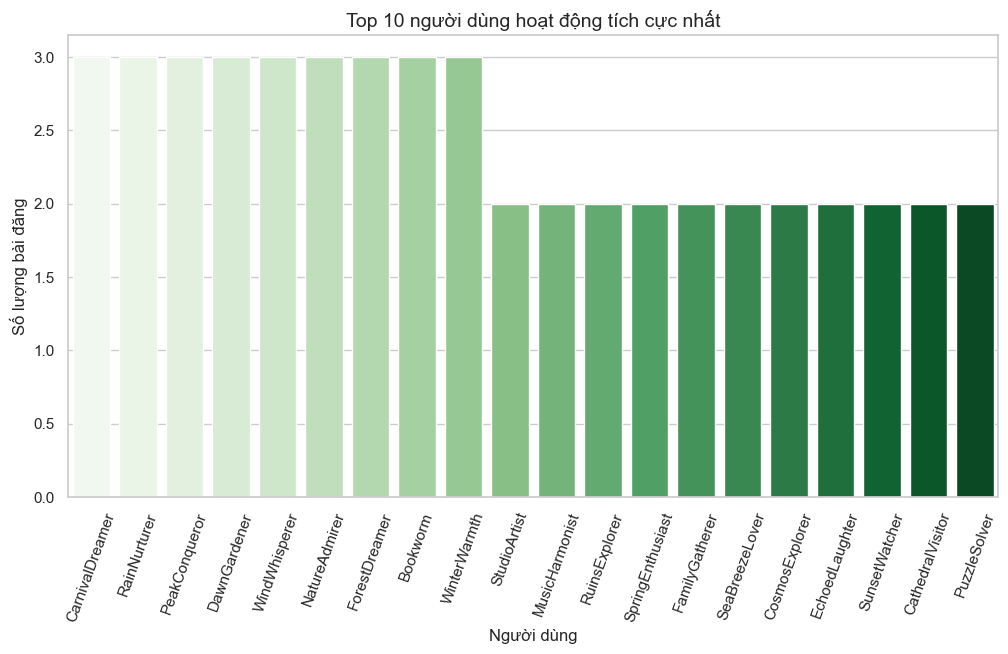

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\top 10 người dùng hoạt động tích cực nhất


In [22]:
# Đếm số bài đăng theo User
df['User']=df['User'].str.strip()
user_counts = df['User'].value_counts().head(20)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="Greens")
plt.title('Top 10 người dùng hoạt động tích cực nhất', fontsize=14)
plt.xlabel('Người dùng', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
plt.xticks(rotation=70)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 người dùng hoạt động tích cực nhất")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

In [23]:
# Sắp xếp theo Likes và lấy top 10
top_likes = df.sort_values(by='Likes', ascending=False).head(10)
print("Top 10 bài đăng có nhiều lượt thích nhất:")
display(top_likes[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

bottom_likes = df.sort_values(by='Likes', ascending=True).head(10)
print("Top 10 bài đăng có ít lượt thích nhất:")
display(bottom_likes[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

# Sắp xếp theo Retweets và lấy top 10
top_retweets = df.sort_values(by='Retweets', ascending=False).head(10)
print("Top 10 bài đăng có nhiều lượt đăng lại nhất:")
display(top_retweets[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

bottom_retweets = df.sort_values(by='Retweets', ascending=True).head(10)
print("Top 10 bài đăng có ít lượt đăng lại nhất:")
display(bottom_retweets[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

Top 10 bài đăng có nhiều lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
570,"Underneath the city lights, the dancer express...",80.0,40.0,Positive,Twitter
345,Motivated to achieve fitness goals after an in...,80.0,40.0,Positive,Facebook
368,Elation over discovering a rare book in a quai...,80.0,40.0,Positive,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Positive,Instagram
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Positive,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,40.0,Positive,Twitter
335,Thrilled to witness the grandeur of a cultural...,80.0,40.0,Positive,Instagram
432,"Heartache deepens, a solitary journey through ...",80.0,40.0,Negative,Instagram
402,Awe-inspired by the vastness of the cosmos on ...,80.0,40.0,Positive,Instagram
470,"Dancing on sunshine, each step a celebration o...",80.0,40.0,Positive,Instagram


Top 10 bài đăng có ít lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
1,Traffic was terrible this morning. ...,10.0,5.0,Negative,Twitter
163,Suffering from despair after another setback....,10.0,5.0,Negative,Twitter
185,"Helplessness engulfs me, drowning in a sea of...",15.0,8.0,Negative,Instagram
209,"Numb to the chaos, emotions locked away, a st...",15.0,8.0,Neutral,Instagram
199,"A numbness settles over me, a shield against ...",15.0,8.0,Neutral,Twitter
164,"Overwhelmed by grief, missing a loved one dea...",15.0,8.0,Negative,Instagram
188,Disgust at the corruption that stains society...,15.0,7.0,Negative,Instagram
175,Disgust at the sight of injustice and cruelty...,15.0,7.0,Negative,Twitter
195,"Boredom lingers, a stagnant pool of indiffere...",15.0,7.0,Negative,Facebook
179,"Jealousy gnaws at my confidence, a toxic emot...",15.0,8.0,Negative,Instagram


Top 10 bài đăng có nhiều lượt đăng lại nhất:


,Text,Likes,Retweets,Sentiment,Platform
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Positive,Instagram
540,Celebrating a historic victory in the World Cu...,80.0,40.0,Positive,Instagram
570,"Underneath the city lights, the dancer express...",80.0,40.0,Positive,Twitter
550,"After a series of defeats, the soccer team fac...",80.0,40.0,Negative,Twitter
510,"At the front row of Adele's concert, each note...",80.0,40.0,Positive,Instagram
530,"Captivated by the spellbinding plot twists, th...",80.0,40.0,Positive,Twitter
520,"At a Justin Bieber concert, the infectious bea...",80.0,40.0,Positive,Instagram
481,"Surrounded by the colors of joy, a canvas pain...",80.0,40.0,Positive,Instagram
402,Awe-inspired by the vastness of the cosmos on ...,80.0,40.0,Positive,Instagram
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Positive,Instagram


Top 10 bài đăng có ít lượt đăng lại nhất:


,Text,Likes,Retweets,Sentiment,Platform
1,Traffic was terrible this morning. ...,10.0,5.0,Negative,Twitter
163,Suffering from despair after another setback....,10.0,5.0,Negative,Twitter
182,"Boredom settles like dust, life feels mundane...",15.0,7.0,Negative,Instagram
188,Disgust at the corruption that stains society...,15.0,7.0,Negative,Instagram
167,Resentment building up over past betrayals. ...,15.0,7.0,Negative,Instagram
175,Disgust at the sight of injustice and cruelty...,15.0,7.0,Negative,Twitter
195,"Boredom lingers, a stagnant pool of indiffere...",15.0,7.0,Negative,Facebook
197,"Lost in the vast sea of information, an indif...",15.0,7.0,Neutral,Instagram
11,Feeling a bit under the weather today. ...,15.0,7.0,Negative,Twitter
185,"Helplessness engulfs me, drowning in a sea of...",15.0,8.0,Negative,Instagram


Thống kê cơ bản cho Retweets và Likes:


,Retweets,Likes
count,732.000000,732.000000
mean,21.508197,42.901639
std,7.061286,14.089848
min,5.000000,10.000000
25%,17.750000,34.750000
50%,22.000000,43.000000
75%,25.000000,50.000000
max,40.000000,80.000000


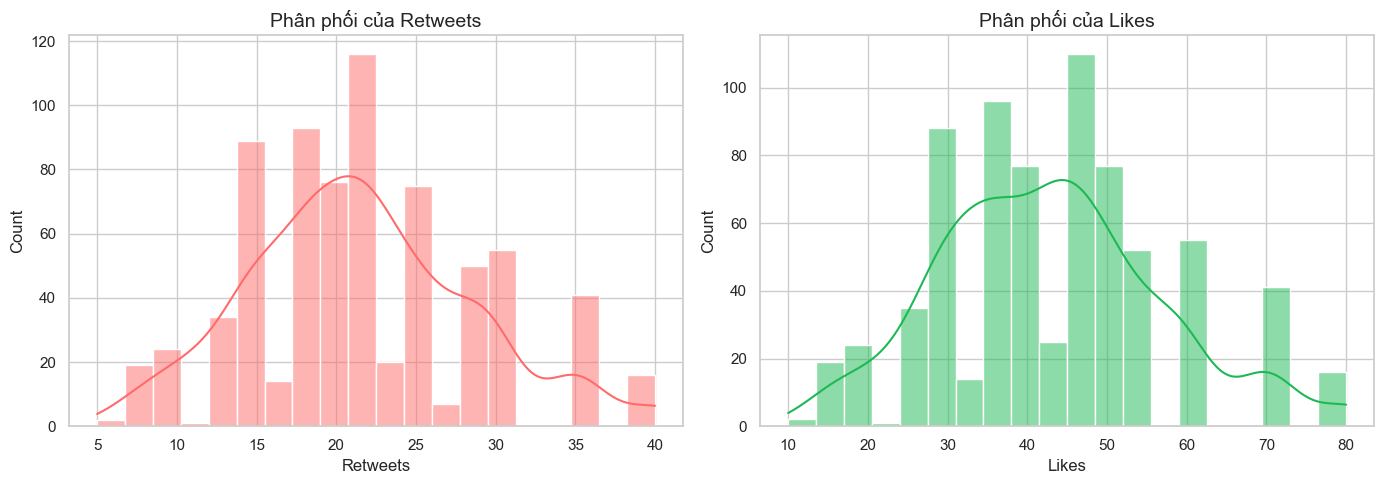

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\phân phối lượt chia sẻ và lượt thích.png


In [24]:
# Thống kê cơ bản
print("Thống kê cơ bản cho Retweets và Likes:")
display(df[['Retweets', 'Likes']].describe())

# Vẽ histogram
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Retweets'], bins=20, kde=True, color=engagement_colors[0])
plt.title('Phân phối của Retweets', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(df['Likes'], bins=20, kde=True, color=engagement_colors[1])
plt.title('Phân phối của Likes', fontsize=14)

plt.tight_layout()
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "phân phối lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

         Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000


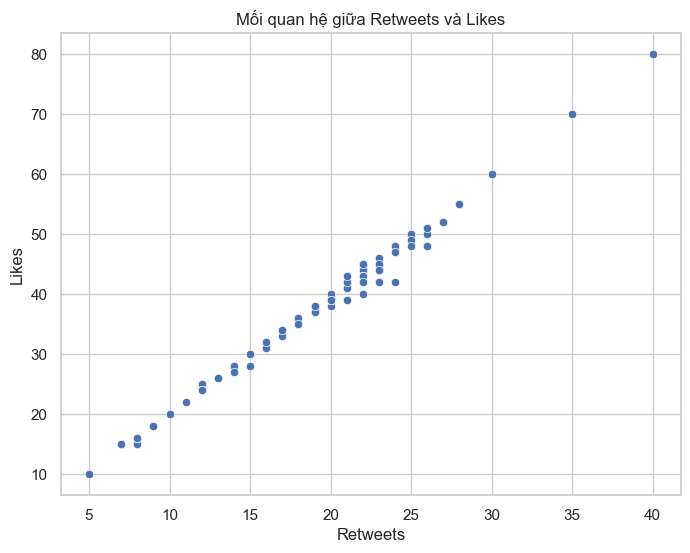

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\mối quan hệ giờ lượt chia sẻ và lượt thích.png
Hệ số tương quan Pearson: 0.9985
Giá trị p: 0.0000


In [25]:
# Kiểm tra phân phối của Retweets và Likes
print(df[['Retweets', 'Likes']].describe())

# Vẽ scatter plot để xem mối quan hệ
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.title('Mối quan hệ giữa Retweets và Likes')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "mối quan hệ giờ lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

# Kiểm tra tương quan Pearson chi tiết
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['Retweets'], df['Likes'])
print(f"Hệ số tương quan Pearson: {correlation:.4f}")
print(f"Giá trị p: {p_value:.4f}")

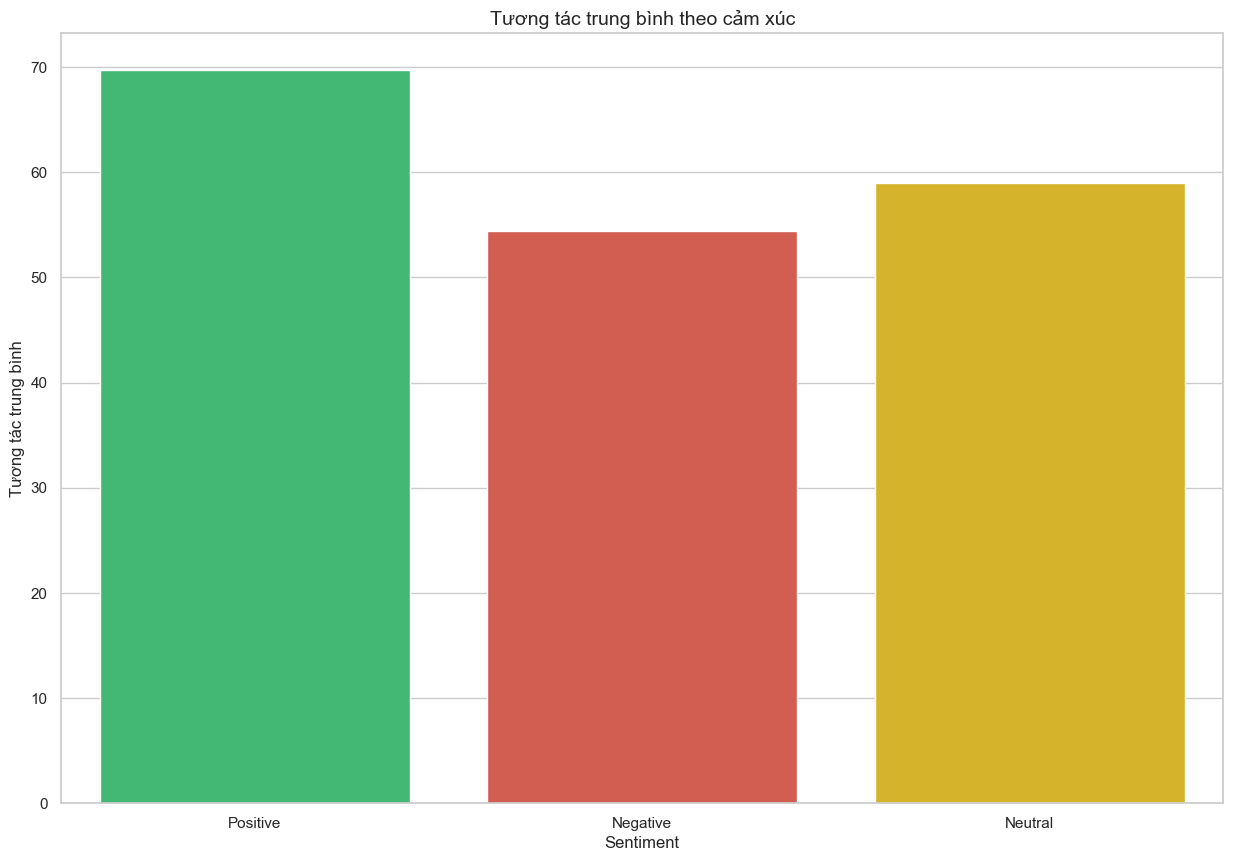

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tương tác trung bình dựa theo cảm xúc.png


In [26]:
# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
df.groupby('Sentiment')['Engagement'].mean()
sns.barplot(x='Sentiment', y='Engagement', data=df, palette=sentiment_colors, ci=None)
plt.title('Tương tác trung bình theo cảm xúc', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tương tác trung bình', fontsize=12)
plt.xticks(rotation=0)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "tương tác trung bình dựa theo cảm xúc.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

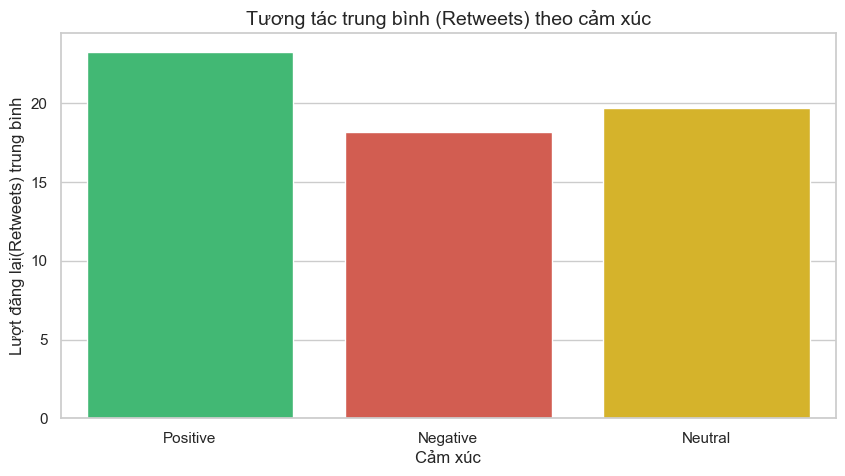

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tương tác trung bình dựa theo lượt đăng lại.png


In [27]:
# Đặt thứ tự sentiment mong muốn
sentiment_order = ['Positive', 'Negative', 'Neutral']
# Tính trung bình Retweets theo Sentiment
retweet_mean = df.groupby('Sentiment')['Retweets'].mean().reset_index()
# Chuyển cột 'Sentiment' thành dạng thứ tự
retweet_mean['Sentiment'] = pd.Categorical(retweet_mean['Sentiment'],
                                            categories=sentiment_order,
                                            ordered=True)
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment', y='Retweets', data=retweet_mean, palette=sentiment_colors, ci=None)
plt.title("Tương tác trung bình (Retweets) theo cảm xúc", fontsize=14)
plt.xlabel("Cảm xúc", fontsize=12)
plt.ylabel("Lượt đăng lại(Retweets) trung bình", fontsize=12)

# Đường dẫn lưu file
file_name = os.path.join(saving_path, "tương tác trung bình dựa theo lượt đăng lại.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

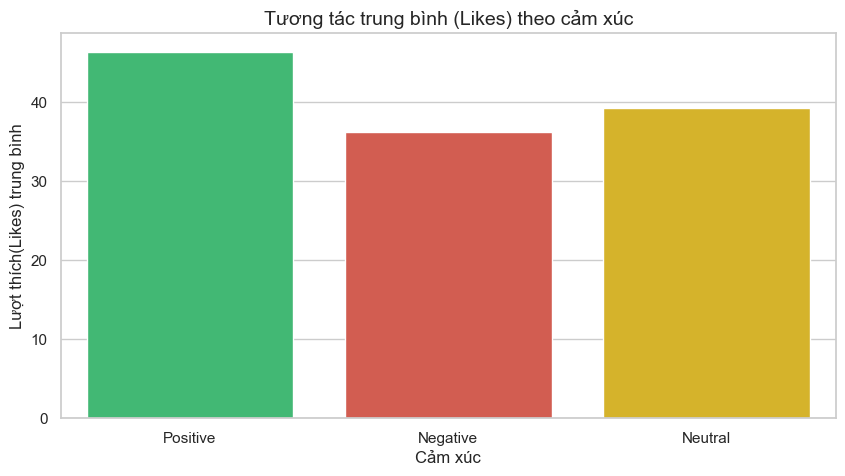

Biểu đồ đã được lưu tại: ..\docs\sentiment_visualization\tương tác trung bình dựa theo lượt thích.png


In [28]:
# Đặt thứ tự sentiment mong muốn
sentiment_order = ['Positive', 'Negative', 'Neutral']
# Tính trung bình Retweets theo Sentiment
retweet_mean = df.groupby('Sentiment')['Likes'].mean().reset_index()
# Chuyển cột 'Sentiment' thành dạng thứ tự
retweet_mean['Sentiment'] = pd.Categorical(retweet_mean['Sentiment'],
                                            categories=sentiment_order,
                                            ordered=True)
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment', y='Likes', data=retweet_mean, palette=sentiment_colors, ci=None)
plt.title("Tương tác trung bình (Likes) theo cảm xúc", fontsize=14)
plt.xlabel("Cảm xúc", fontsize=12)
plt.ylabel("Lượt thích(Likes) trung bình", fontsize=12)

# Đường dẫn lưu file
file_name = os.path.join(saving_path, "tương tác trung bình dựa theo lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

In [29]:
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Hàm làm sạch văn bản
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@\w+|#\w+|[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Áp dụng xử lý
df['clean_text'] = df['Text'].astype(str).apply(clean_text)

# Vẽ WordCloud theo từng cảm xúc
# for sentiment in ['Positive', 'Negative', 'Neutral']:
#     subset = df[df['Sentiment'] == sentiment]
#     text = ' '.join(subset['clean_text'])
#     
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f"Từ thường gặp trong bài viết có cảm xúc {sentiment}", fontsize=14)
#     # Đường dẫn lưu file
#     file_name = os.path.join(saving_path, f"các từ thường gặp trong các bài đăng có cảm xúc {sentiment}.png")
#     
#     # Lưu biểu đồ
#     plt.savefig(file_name, dpi=300, bbox_inches='tight')
#     plt.show()
# In ra top từ phổ biến cho từng sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[df['Sentiment'] == sentiment]
    # Tách văn bản thành danh sách các từ
    all_words = ' '.join(subset['clean_text']).split()
    counter = Counter(all_words)
    common_words = counter.most_common(10)
    
    print(f"\nTop từ phổ biến trong bài viết cảm xúc {sentiment}:")
    for word, freq in common_words:
        print(f"- {word}: {freq} lần")



Top từ phổ biến trong bài viết cảm xúc Positive:
- new: 31 lần
- laughter: 22 lần
- joy: 21 lần
- beauty: 19 lần
- sky: 17 lần
- friends: 16 lần
- dreams: 16 lần
- feeling: 15 lần
- world: 15 lần
- concert: 15 lần

Top từ phổ biến trong bài viết cảm xúc Negative:
- like: 15 lần
- despair: 14 lần
- echoes: 14 lần
- shattered: 13 lần
- heart: 12 lần
- feeling: 11 lần
- lost: 10 lần
- loneliness: 9 lần
- grief: 8 lần
- frustration: 8 lần

Top từ phổ biến trong bài viết cảm xúc Neutral:
- new: 11 lần
- curiosity: 10 lần
- old: 8 lần
- nostalgia: 8 lần
- exploring: 8 lần
- day: 7 lần
- confusion: 7 lần
- lifes: 7 lần
- emotions: 7 lần
- knowledge: 6 lần


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Top từ phổ biến trong bài viết cảm xúc Positive:
- 31, 'new': 'Mới',
- 22, 'laughter': 'Tiếng cười',
- 21, 'joy': 'Niềm vui',
- 19, 'beauty': 'Vẻ đẹp',
- 17, 'sky': 'Bầu trời',
- 16, 'friends': 'Những người bạn',
- 16, 'dreams': 'Những giấc mơ',
- 15, 'feeling': 'Cảm giác',
- 15, 'world': 'Thế giới',
- 15, 'concert': 'Buổi hòa nhạc',
# Top từ phổ biến trong bài viết cảm xúc Negative:
- 15, 'like': 'Thích',
- 14, 'despair': 'Tuyệt vọng',
- 14, 'echoes': 'Tiếng vang',
- 13, 'shattered': 'Tan vỡ',
- 12, 'heart': 'Trái tim',
- 11, 'feeling': 'Cảm giác',
- 10, 'lost': 'Lạc lõng',
- 9,  'loneliness': 'Cô đơn',
- 8,  'grief': 'Đau buồn',
- 8,  'frustration': 'Bực bội',  
#  Top từ phổ biến trong bài viết cảm xúc Neutral:
- 11, 'new': 'Mới',
- 10, 'curiosity': 'Sự tò mò',
- 8,  'old': 'Cũ',
- 8,  'nostalgia': 'Hoài niệm',
- 8,  'exploring': 'Khám phá',
- 7,  'day': 'Ngày',
- 7,  'confusion': 'Bối rối',
- 7,  'lifes': 'Cuộc sống',
- 7,  'emotions': 'Cảm xúc',
- 6,  'knowledge': 'Kiến thức', 



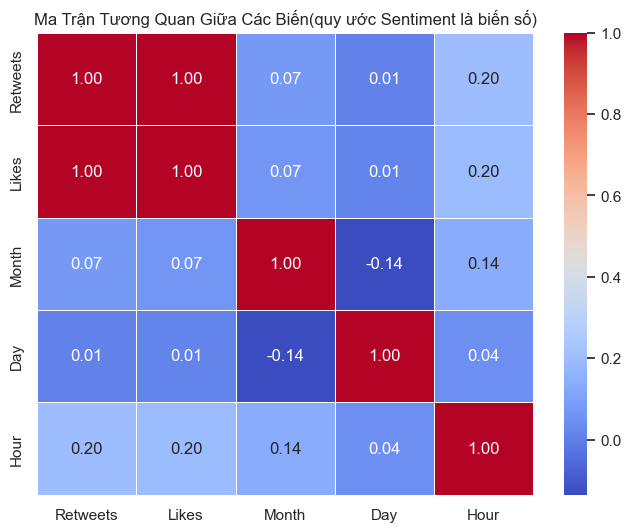

In [30]:
# Chuyển đổi Sentiment thành giá trị số
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_num'] = df['Sentiment'].map(sentiment_mapping)

# Tính toán lại ma trận tương quan bao gồm Sentiment_numeric
correlation_matrix_with_sentiment = df[[ 'Retweets', 'Likes','Month', 'Day', 'Hour']].corr()

# Vẽ heatmap hiển thị ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_with_sentiment, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma Trận Tương Quan Giữa Các Biến(quy ước Sentiment là biến số)')
# Đường dẫn lưu file
file_name = os.path.join(saving_path, "ma trận tương quan giữa các biến(quy ước Sentiment là biến số).png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

In [31]:
text = "new feeling day joy joy"
low_value_words = {'new', 'feeling', 'day', 'world'}

text = ' '.join([word for word in text.split() if word not in low_value_words])
print(text)

joy joy


# Huấn luyện mô hình

In [32]:
# 1. Đọc dữ liệu

print("Kích thước dữ liệu:", df.shape)
print(df.info())
print(df['Sentiment'].value_counts())

Kích thước dữ liệu: (732, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Text           732 non-null    object        
 1   Sentiment      732 non-null    object        
 2   Timestamp      732 non-null    datetime64[ns]
 3   User           732 non-null    object        
 4   Platform       732 non-null    object        
 5   Hashtags       732 non-null    object        
 6   Retweets       732 non-null    float64       
 7   Likes          732 non-null    float64       
 8   Country        732 non-null    object        
 9   Year           732 non-null    int64         
 10  Month          732 non-null    int64         
 11  Day            732 non-null    int64         
 12  Hour           732 non-null    int32         
 13  DayOfWeek      732 non-null    int32         
 14  Engagement     732 non-null    float64      

In [33]:
# 2. Tiền xử lý
df = df.dropna(subset=['Text', 'Sentiment'])
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]
def preprocess_text(text, remove_stopwords=True):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs and emails
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\S+@\S+", '', text)

    # 3. Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('utf-8')  # giữ lại ASCII thôi

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 6. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Remove stopwords (optional)
    if remove_stopwords:
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

    # 8. Remove low value word
    text = ' '.join([word for word in text.split() if word not in low_value_words])


    return text
df['Clean_Text'] = df['Text'].apply(preprocess_text)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 3),
    # stop_words='english',
)
X = tfidf_vectorizer.fit_transform(df['Clean_Text'])

# In ra kích thước dữ liệu trước khi cân bằng
print(f"\nKích thước dữ liệu trước khi cân bằng: {X.shape}")
# Áp dụng Random Over-sampling để cân bằng dữ liệu
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# In ra kích thước dữ liệu sau khi cân bằng
print(f"Kích thước dữ liệu sau khi over-sampling: {X.shape}")


Kích thước dữ liệu trước khi cân bằng: (732, 1000)
Kích thước dữ liệu sau khi over-sampling: (1344, 1000)


# Huấn luyện trên mô hình Logistic Regression

Tập huấn luyện: 941 mẫu
Tập validation: 201 mẫu
Tập kiểm tra: 202 mẫu

Kết quả trên tập Validation:

Validation Accuracy: 0.9054726368159204
              precision    recall  f1-score   support

    Negative       0.97      0.94      0.95        67
     Neutral       0.91      0.87      0.89        67
    Positive       0.85      0.91      0.88        67

    accuracy                           0.91       201
   macro avg       0.91      0.91      0.91       201
weighted avg       0.91      0.91      0.91       201


Kết quả trên tập Test:

Test Accuracy: 0.905940594059406
              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96        67
     Neutral       0.87      0.91      0.89        67
    Positive       0.89      0.85      0.87        68

    accuracy                           0.91       202
   macro avg       0.91      0.91      0.91       202
weighted avg       0.91      0.91      0.91       202



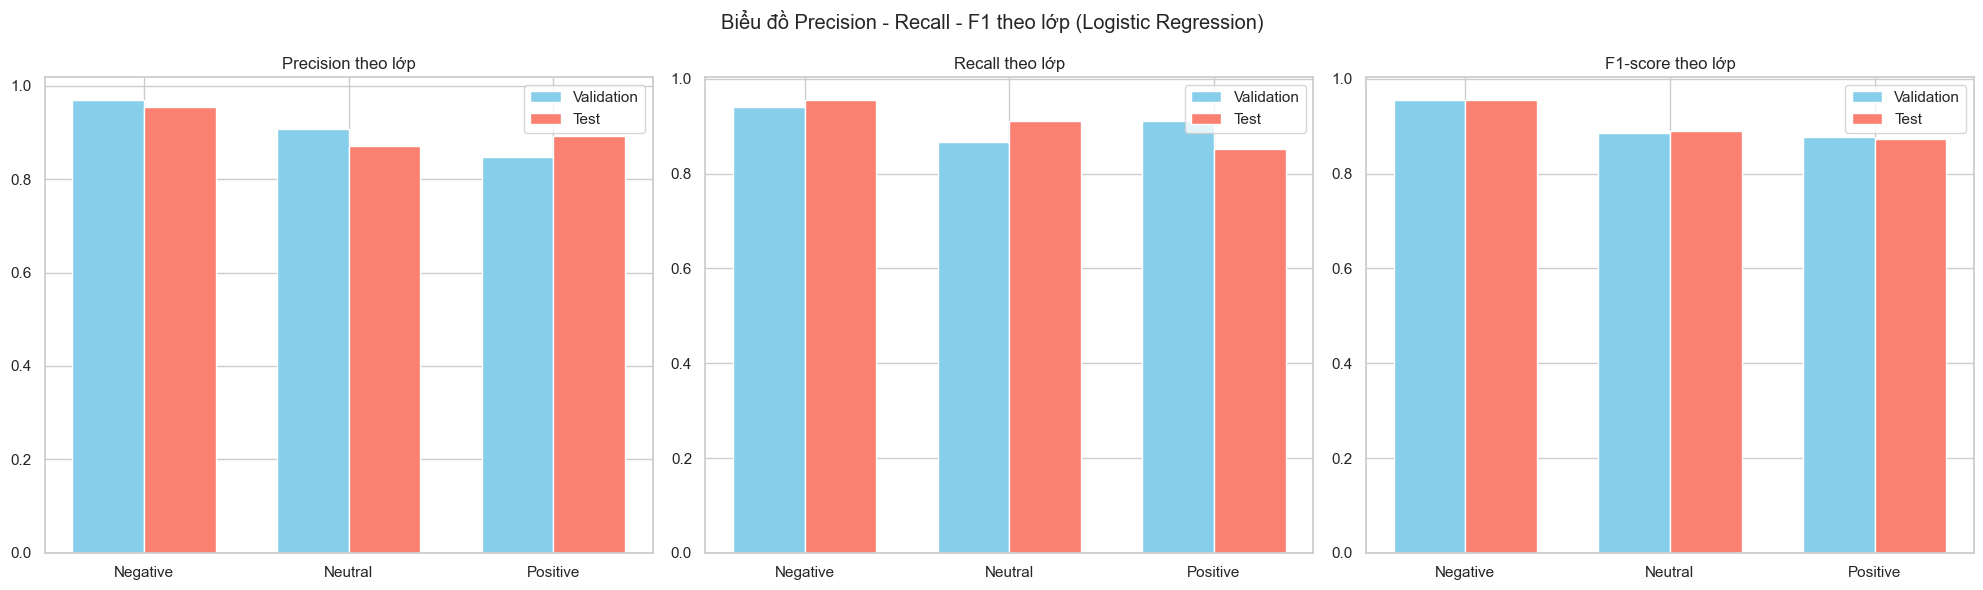

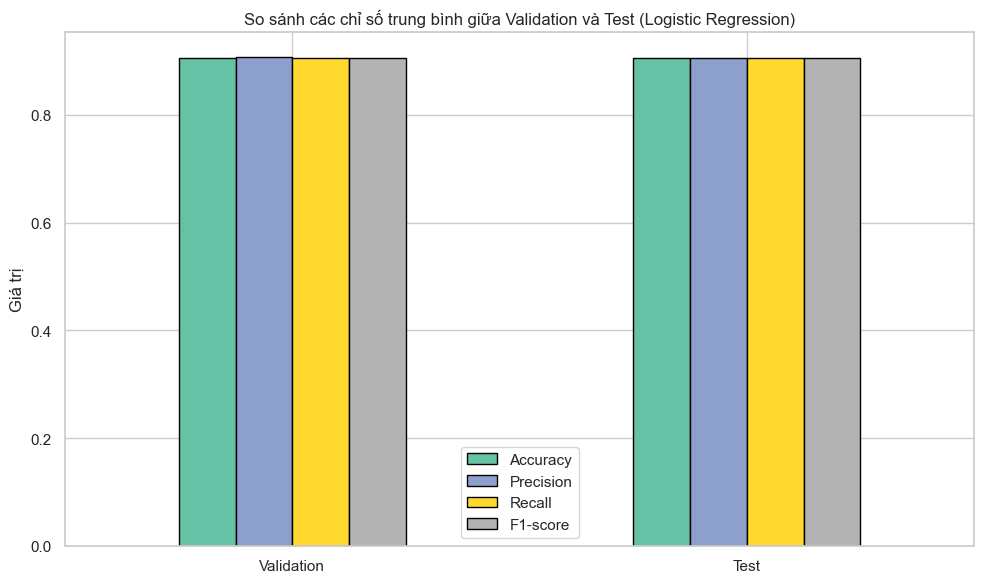

In [34]:
# Đường dẫn lưu model
save_dir = f'train_archive/Logistic_Regression'
os.makedirs(save_dir, exist_ok=True)
# 3. Chia tập train / val / test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.176, random_state=42, stratify=y_train_val)

print(f"Tập huấn luyện: {X_train.shape[0]} mẫu")
print(f"Tập validation: {X_val.shape[0]} mẫu")
print(f"Tập kiểm tra: {X_test.shape[0]} mẫu")

# 4. Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# 5. Đánh giá mô hình
def evaluate_model(model, X, y_true, label, save_conf_path):
    y_pred = model.predict(X)
    acc = accuracy_score(y_true, y_pred)
    print(f"\nKết quả trên tập {label}:")
    print(f"\n{label} Accuracy:", acc)
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.title(f'Ma trận nhầm lẫn - {label}')
    plt.savefig(save_conf_path)
    plt.close()

    return y_pred

y_val_pred = evaluate_model(model, X_val, y_val, "Validation", f"{save_dir}/confusion_matrix_LR_val.png")
y_test_pred = evaluate_model(model, X_test, y_test, "Test", f"{save_dir}/confusion_matrix_LR_test.png")

# 6. Lưu model và các thành phần
pickle.dump(model, open(f"{save_dir}/sentiment.pkl", 'wb'))
pickle.dump(tfidf_vectorizer, open(f"{save_dir}/vectorizer.pkl", 'wb'))
pickle.dump(label_encoder, open(f"{save_dir}/label_encoder.pkl", 'wb'))

# 7. Vẽ biểu đồ các chỉ số Precision, Recall, F1 theo từng lớp
def plot_metrics_by_class(y_true_val, y_pred_val, y_true_test, y_pred_test):
    labels = label_encoder.classes_
    x = np.arange(len(labels))

    metrics_val = precision_recall_fscore_support(y_true_val, y_pred_val, average=None, labels=range(len(labels)))
    metrics_test = precision_recall_fscore_support(y_true_test, y_pred_test, average=None, labels=range(len(labels)))

    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    width = 0.35

    ax[0].bar(x - width/2, metrics_val[0], width, label='Validation', color='skyblue')
    ax[0].bar(x + width/2, metrics_test[0], width, label='Test', color='salmon')
    ax[0].set_title('Precision theo lớp')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(labels)
    ax[0].legend()
    ax[0].grid(True)

    ax[1].bar(x - width/2, metrics_val[1], width, label='Validation', color='skyblue')
    ax[1].bar(x + width/2, metrics_test[1], width, label='Test', color='salmon')
    ax[1].set_title('Recall theo lớp')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    ax[1].grid(True)

    ax[2].bar(x - width/2, metrics_val[2], width, label='Validation', color='skyblue')
    ax[2].bar(x + width/2, metrics_test[2], width, label='Test', color='salmon')
    ax[2].set_title('F1-score theo lớp')
    ax[2].set_xticks(x)
    ax[2].set_xticklabels(labels)
    ax[2].legend()
    ax[2].grid(True)

    plt.suptitle('Biểu đồ Precision - Recall - F1 theo lớp (Logistic Regression)')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/metrics_by_class_LR.png")
    

plot_metrics_by_class(y_val, y_val_pred, y_test, y_test_pred)

# 8. Biểu đồ tổng hợp chỉ số trung bình
avg_metrics = {
    'Accuracy': [accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_val, y_val_pred, average='macro'), precision_score(y_test, y_test_pred, average='macro')],
    'Recall': [recall_score(y_val, y_val_pred, average='macro'), recall_score(y_test, y_test_pred, average='macro')],
    'F1-score': [f1_score(y_val, y_val_pred, average='macro'), f1_score(y_test, y_test_pred, average='macro')]
}

metrics_df = pd.DataFrame(avg_metrics, index=['Validation', 'Test'])
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title("So sánh các chỉ số trung bình giữa Validation và Test (Logistic Regression)")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Huấn luyện trên mô hình Suport Vector Machine


Kết quả trên tập validation:

Validation Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

    Negative       0.98      0.94      0.96        67
     Neutral       0.93      0.93      0.93        67
    Positive       0.87      0.91      0.89        67

    accuracy                           0.93       201
   macro avg       0.93      0.93      0.93       201
weighted avg       0.93      0.93      0.93       201


Kết quả trên tập test:

Test Accuracy: 0.9207920792079208
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97        67
     Neutral       0.88      0.94      0.91        67
    Positive       0.91      0.87      0.89        68

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



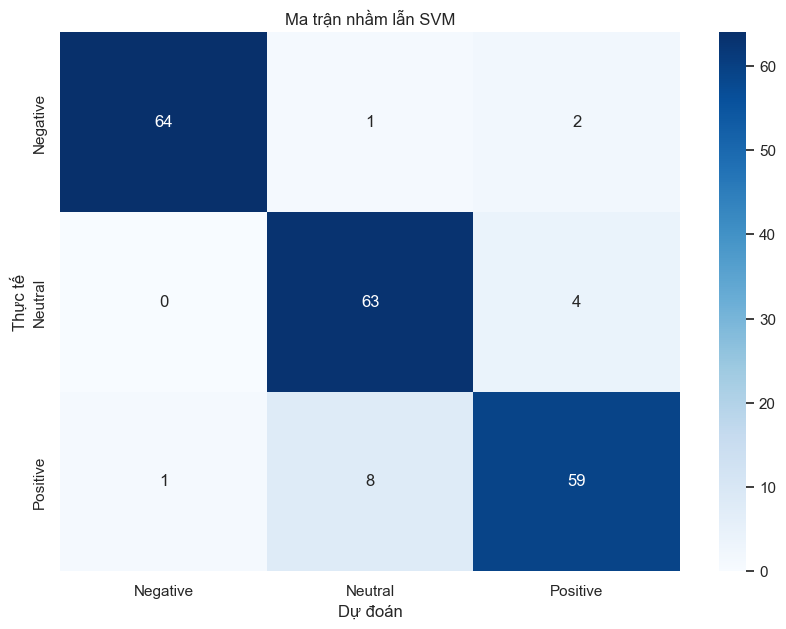

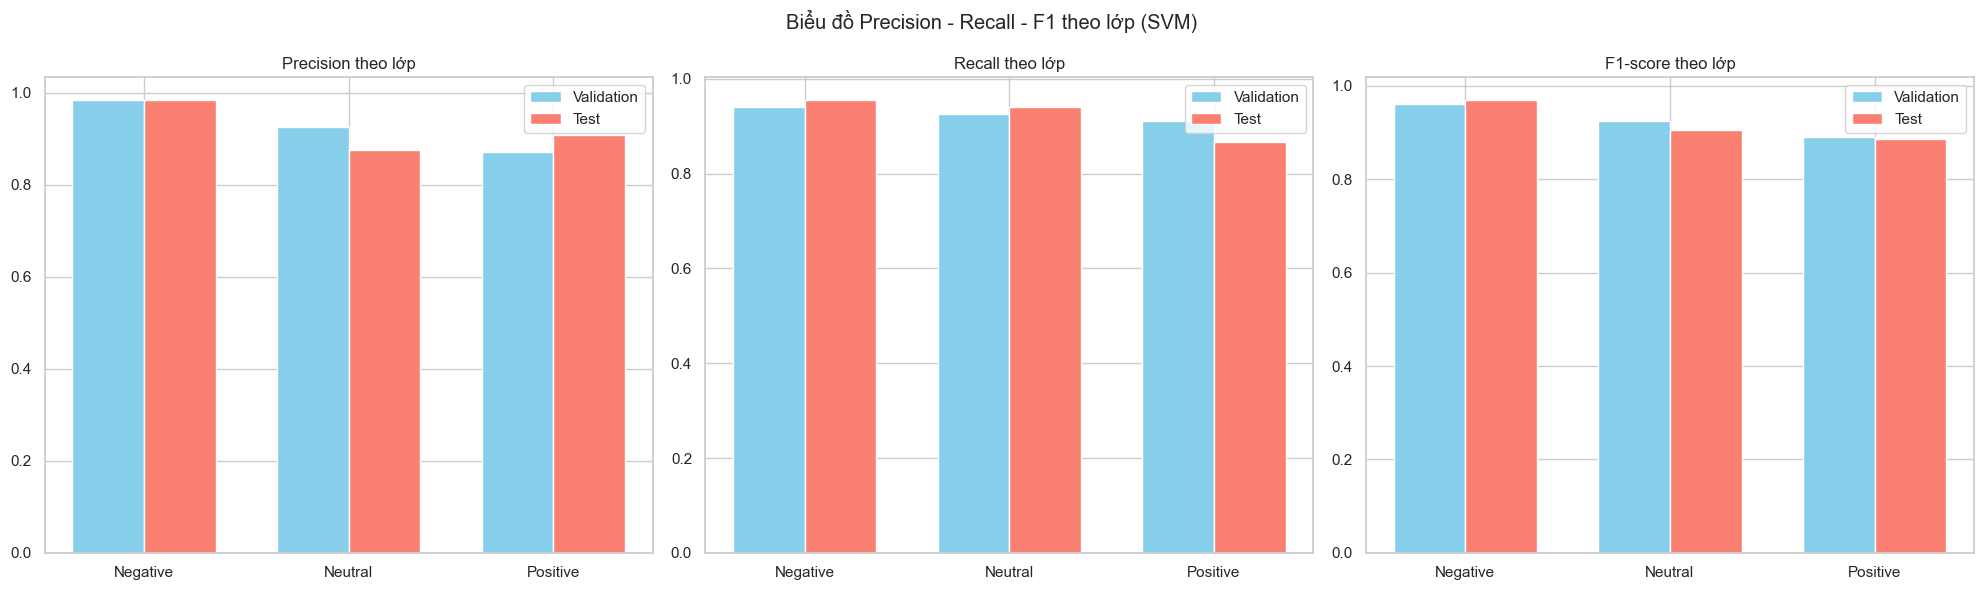

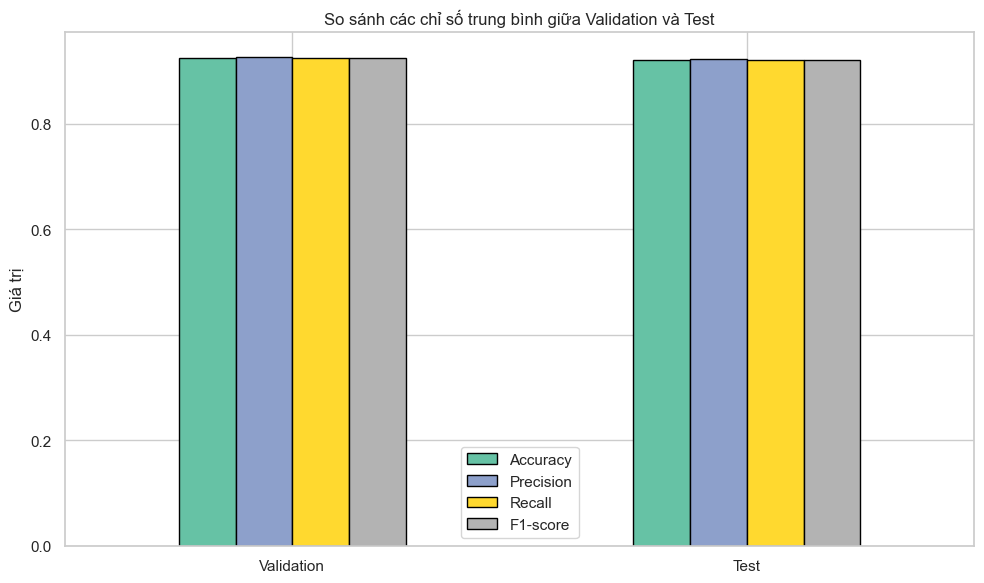

In [35]:
# Thư mục lưu model
save_dir = 'train_archive/Support_Vector_Machine'
os.makedirs(save_dir, exist_ok=True)
# 4. Chia dữ liệu
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)

# 5. Huấn luyện mô hình
model = SVC(probability=True, kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)

# 6. Đánh giá mô hình
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("\nKết quả trên tập validation:\n")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

print("\nKết quả trên tập test:\n")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print( classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))
# 7. Lưu mô hình và thành phần
pickle.dump(model, open(f'{save_dir}/sentiment.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open(f'{save_dir}/vectorizer.pkl', 'wb'))
pickle.dump(label_encoder, open(f'{save_dir}/label_encoder.pkl', 'wb'))

# 8. Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn SVM')
plt.savefig(f'{save_dir}/confusion_matrix.png')

# 9. Vẽ biểu đồ Precision, Recall, F1 theo lớp
metrics_val = precision_recall_fscore_support(y_val, y_val_pred, average=None, labels=range(len(label_encoder.classes_)))
metrics_test = precision_recall_fscore_support(y_test, y_test_pred, average=None, labels=range(len(label_encoder.classes_)))

labels = label_encoder.classes_
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].bar(x - width/2, metrics_val[0], width, label='Validation', color='skyblue')
ax[0].bar(x + width/2, metrics_test[0], width, label='Test', color='salmon')
ax[0].set_title('Precision theo lớp')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].grid(True)

ax[1].bar(x - width/2, metrics_val[1], width, label='Validation', color='skyblue')
ax[1].bar(x + width/2, metrics_test[1], width, label='Test', color='salmon')
ax[1].set_title('Recall theo lớp')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].grid(True)

ax[2].bar(x - width/2, metrics_val[2], width, label='Validation', color='skyblue')
ax[2].bar(x + width/2, metrics_test[2], width, label='Test', color='salmon')
ax[2].set_title('F1-score theo lớp')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()
ax[2].grid(True)

plt.suptitle('Biểu đồ Precision - Recall - F1 theo lớp (SVM)')
plt.tight_layout()
plt.savefig(f'{save_dir}/metrics_by_class.png')

# 10. Vẽ biểu đồ tổng hợp
avg_metrics = {
    'Accuracy': [accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_val, y_val_pred, average='macro'), precision_score(y_test, y_test_pred, average='macro')],
    'Recall': [recall_score(y_val, y_val_pred, average='macro'), recall_score(y_test, y_test_pred, average='macro')],
    'F1-score': [f1_score(y_val, y_val_pred, average='macro'), f1_score(y_test, y_test_pred, average='macro')]
}

metrics_df = pd.DataFrame(avg_metrics, index=['Validation', 'Test'])
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title("So sánh các chỉ số trung bình giữa Validation và Test")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{save_dir}/avg_metrics_comparison.png')


# Huấn luyện trên mô hình XGBoost

Tập huấn luyện: 941 mẫu
Tập validation: 201 mẫu
Tập kiểm tra: 202 mẫu
[0]	validation_0-mlogloss:0.91726	validation_1-mlogloss:1.01077
[1]	validation_0-mlogloss:0.80261	validation_1-mlogloss:0.97073
[2]	validation_0-mlogloss:0.72833	validation_1-mlogloss:0.94878
[3]	validation_0-mlogloss:0.66006	validation_1-mlogloss:0.91061
[4]	validation_0-mlogloss:0.60847	validation_1-mlogloss:0.88533
[5]	validation_0-mlogloss:0.56513	validation_1-mlogloss:0.87376
[6]	validation_0-mlogloss:0.52648	validation_1-mlogloss:0.86036
[7]	validation_0-mlogloss:0.49328	validation_1-mlogloss:0.85503
[8]	validation_0-mlogloss:0.46497	validation_1-mlogloss:0.85275
[9]	validation_0-mlogloss:0.43914	validation_1-mlogloss:0.84133
[10]	validation_0-mlogloss:0.41614	validation_1-mlogloss:0.83023
[11]	validation_0-mlogloss:0.39526	validation_1-mlogloss:0.81580
[12]	validation_0-mlogloss:0.37696	validation_1-mlogloss:0.80941
[13]	validation_0-mlogloss:0.35961	validation_1-mlogloss:0.80225
[14]	validation_0-mlogloss:0.3

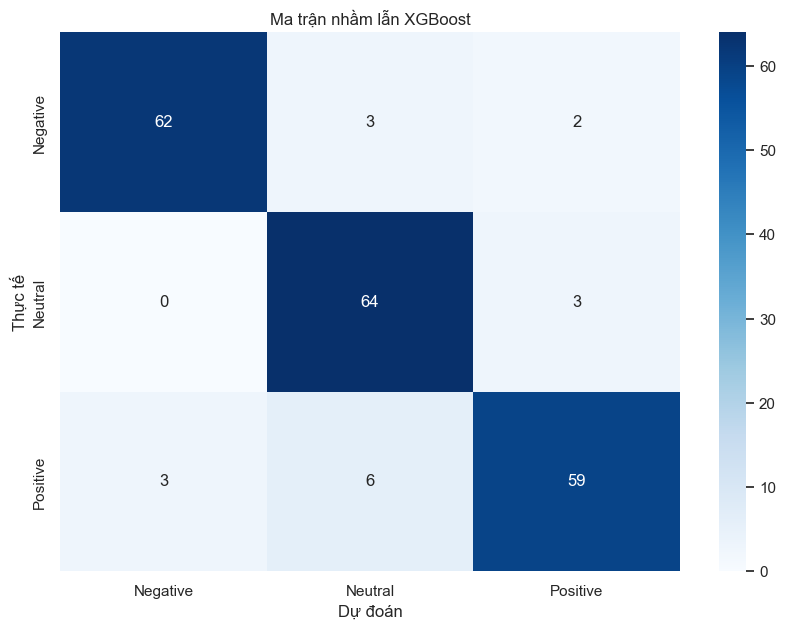

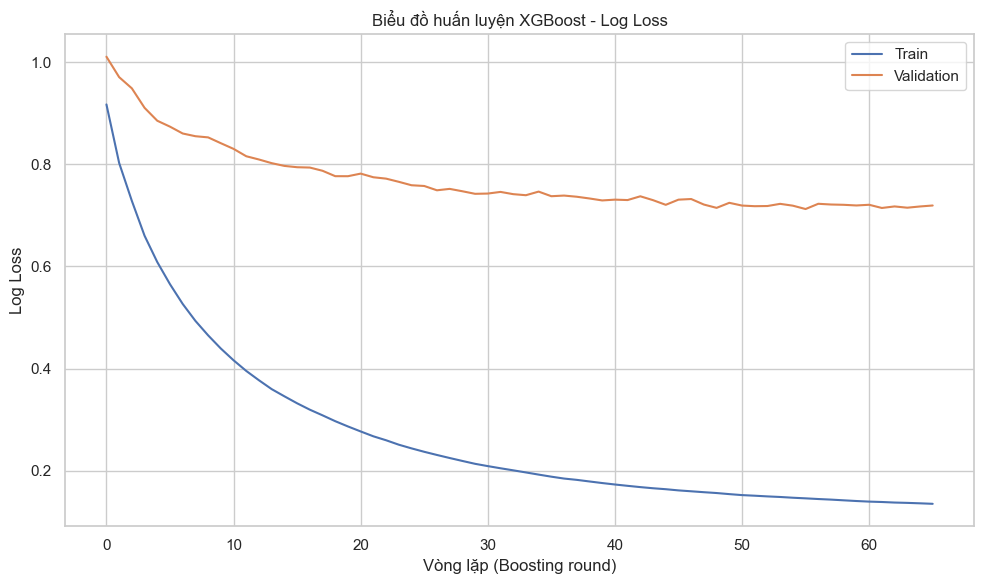

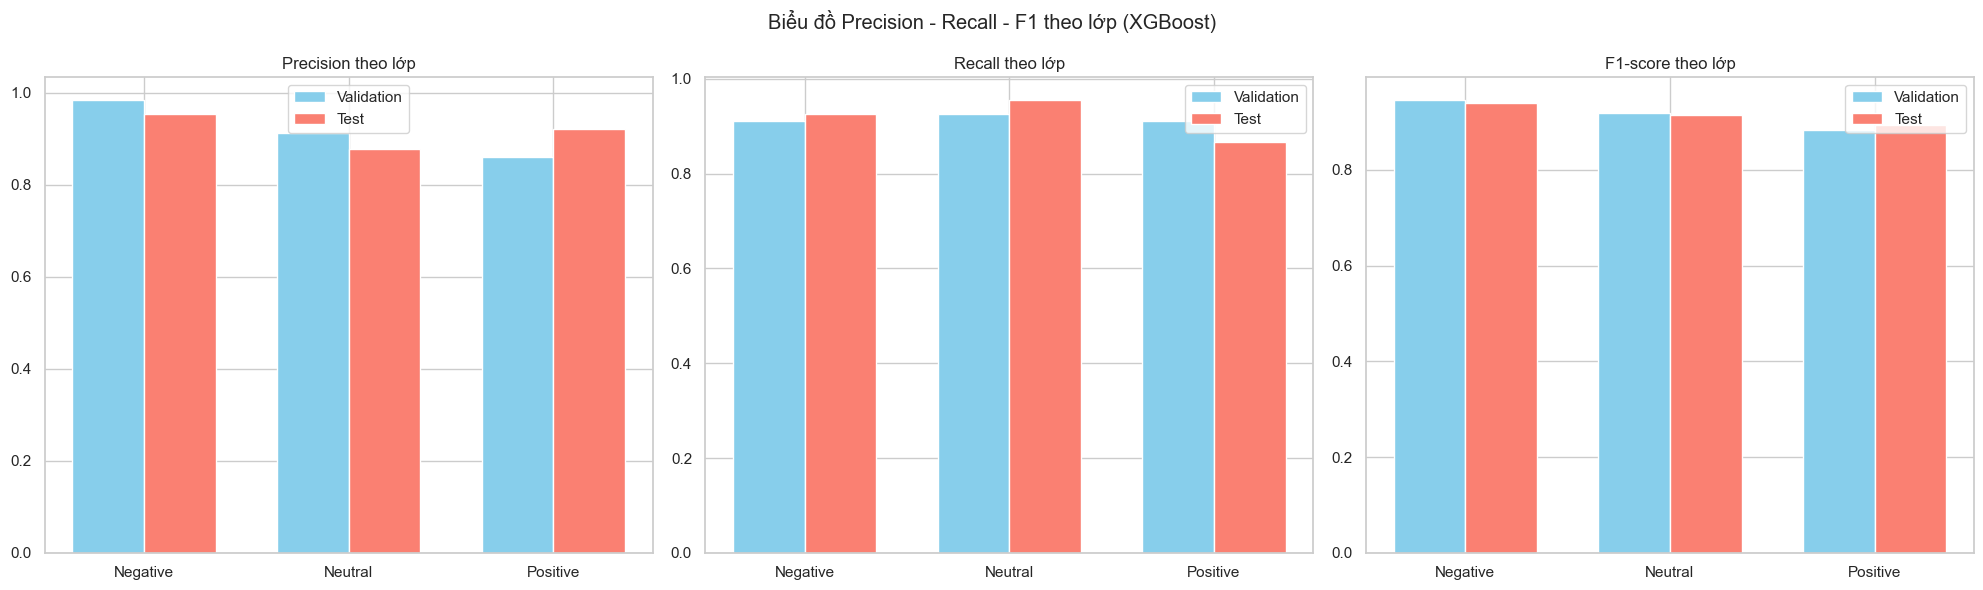

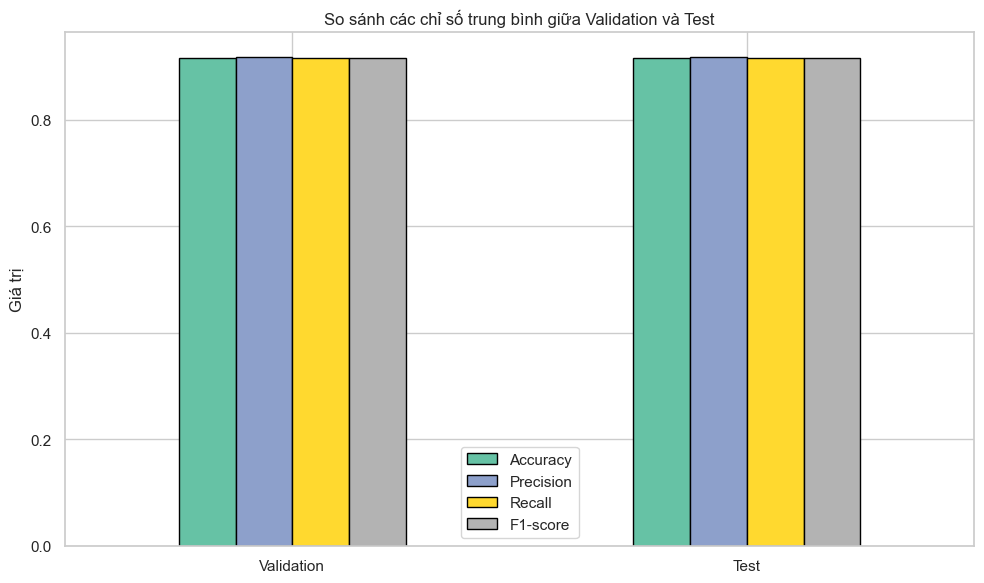

In [36]:
# Tạo thư mục lưu trữ
save_dir = f'train_archive/XGBoost'
os.makedirs(save_dir, exist_ok=True)

# 4. Chia dữ liệu thành tập train, validation và test (tỷ lệ 7:1.5:1.5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.176, random_state=42, stratify=y_train_val)

print(f"Tập huấn luyện: {X_train.shape[0]} mẫu")
print(f"Tập validation: {X_val.shape[0]} mẫu")
print(f"Tập kiểm tra: {X_test.shape[0]} mẫu")

# 6. Khởi tạo và huấn luyện mô hình XGBClassifier với tham số đã tối ưu
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    eval_metric='mlogloss',
    colsample_bytree=0.8,
    learning_rate=0.5,
    max_depth=10,
    min_child_weight=1,
    n_estimators=150,
    reg_alpha=0.5,
    reg_lambda=0.5,
    subsample=0.8,
    random_state=42,
    early_stopping_rounds=10,
    verbose=True
)

# Huấn luyện mô hình với validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

# Lấy kết quả đánh giá trong quá trình huấn luyện
evals_result = model.evals_result()

# 7. Đánh giá mô hình
y_val_pred = model.predict_proba(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
print("\nKết quả trên tập validation:")
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred_labels))
print(classification_report(y_val, y_val_pred_labels, target_names=label_encoder.classes_))

y_test_pred = model.predict_proba(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
print("\nKết quả trên tập test:")
print("\nAccuracy test:", accuracy_score(y_test, y_test_pred_labels))
print(classification_report(y_test, y_test_pred_labels, target_names=label_encoder.classes_))

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_test_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn XGBoost')
plt.savefig(f'{save_dir}/confusion_matrix_XGB.png')

# 9. Lưu mô hình và các thành phần cần thiết
pickle.dump(model, open(f'{save_dir}/sentiment.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open(f'{save_dir}/vectorizer.pkl', 'wb'))
pickle.dump(label_encoder, open(f'{save_dir}/label_encoder.pkl', 'wb'))

# Vẽ biểu đồ train vs validation log loss
evals_result = model.evals_result()

# Lấy dữ liệu training curve từ evals_result
train_loss = evals_result['validation_0']['mlogloss']
val_loss = evals_result['validation_1']['mlogloss']
epochs = len(train_loss)
x_axis = range(epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, train_loss, label='Train')
plt.plot(x_axis, val_loss, label='Validation')
plt.xlabel('Vòng lặp (Boosting round)')
plt.ylabel('Log Loss')
plt.title('Biểu đồ huấn luyện XGBoost - Log Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{save_dir}/training_curve.png')

# 10. Vẽ biểu đồ F1-score, Precision, Recall theo từng lớp
# Tính chỉ số cho tập validation và test
metrics_val = precision_recall_fscore_support(y_val, y_val_pred_labels, average=None, labels=range(len(label_encoder.classes_)))
metrics_test = precision_recall_fscore_support(y_test, y_test_pred_labels, average=None, labels=range(len(label_encoder.classes_)))

labels = label_encoder.classes_
x = np.arange(len(labels))  # vị trí nhãn

# Vẽ biểu đồ so sánh từng chỉ số theo lớp
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
width = 0.35

# Precision
ax[0].bar(x - width/2, metrics_val[0], width, label='Validation', color='skyblue')
ax[0].bar(x + width/2, metrics_test[0], width, label='Test', color='salmon')
ax[0].set_title('Precision theo lớp')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].grid(True)

# Recall
ax[1].bar(x - width/2, metrics_val[1], width, label='Validation', color='skyblue')
ax[1].bar(x + width/2, metrics_test[1], width, label='Test', color='salmon')
ax[1].set_title('Recall theo lớp')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].grid(True)

# F1-score
ax[2].bar(x - width/2, metrics_val[2], width, label='Validation', color='skyblue')
ax[2].bar(x + width/2, metrics_test[2], width, label='Test', color='salmon')
ax[2].set_title('F1-score theo lớp')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()
ax[2].grid(True)

plt.suptitle('Biểu đồ Precision - Recall - F1 theo lớp (XGBoost)')
plt.tight_layout()
plt.savefig(f'{save_dir}/metrics_by_class.png')

# 11. Vẽ biểu đồ tổng hợp các chỉ số trung bình
avg_metrics = {
    'Accuracy': [accuracy_score(y_val, y_val_pred_labels), accuracy_score(y_test, y_test_pred_labels)],
    'Precision': [precision_score(y_val, y_val_pred_labels, average='macro'), precision_score(y_test, y_test_pred_labels, average='macro')],
    'Recall': [recall_score(y_val, y_val_pred_labels, average='macro'), recall_score(y_test, y_test_pred_labels, average='macro')],
    'F1-score': [f1_score(y_val, y_val_pred_labels, average='macro'), f1_score(y_test, y_test_pred_labels, average='macro')]
}

metrics_df = pd.DataFrame(avg_metrics, index=['Validation', 'Test'])
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title("So sánh các chỉ số trung bình giữa Validation và Test")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{save_dir}/avg_metrics_comparison.png')

# Huấn luyện trên mô hình Naive Bayes


Kết quả trên tập validation:

Validation Accuracy: 0.900497512437811
              precision    recall  f1-score   support

    Negative       0.94      0.99      0.96        67
     Neutral       0.82      0.90      0.86        67
    Positive       0.95      0.82      0.88        67

    accuracy                           0.90       201
   macro avg       0.90      0.90      0.90       201
weighted avg       0.90      0.90      0.90       201


Kết quả trên tập test:

Test Accuracy: 0.8663366336633663
              precision    recall  f1-score   support

    Negative       0.90      0.96      0.93        67
     Neutral       0.78      0.93      0.85        67
    Positive       0.94      0.72      0.82        68

    accuracy                           0.87       202
   macro avg       0.88      0.87      0.86       202
weighted avg       0.88      0.87      0.86       202



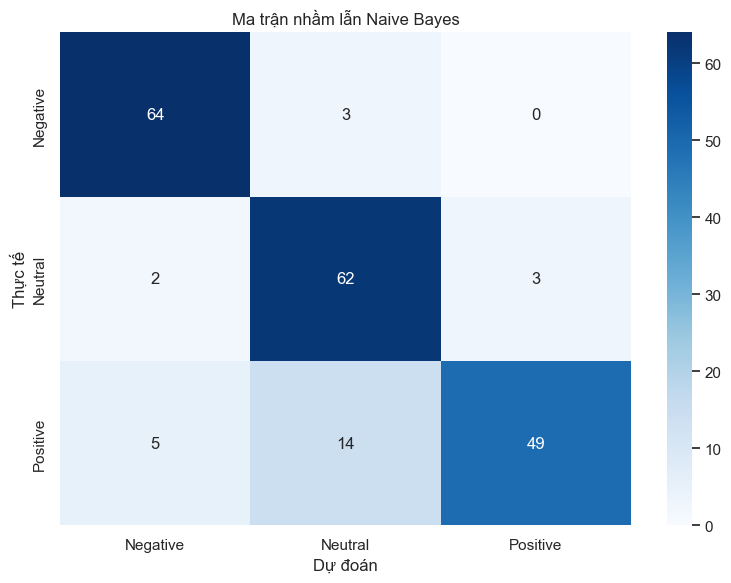

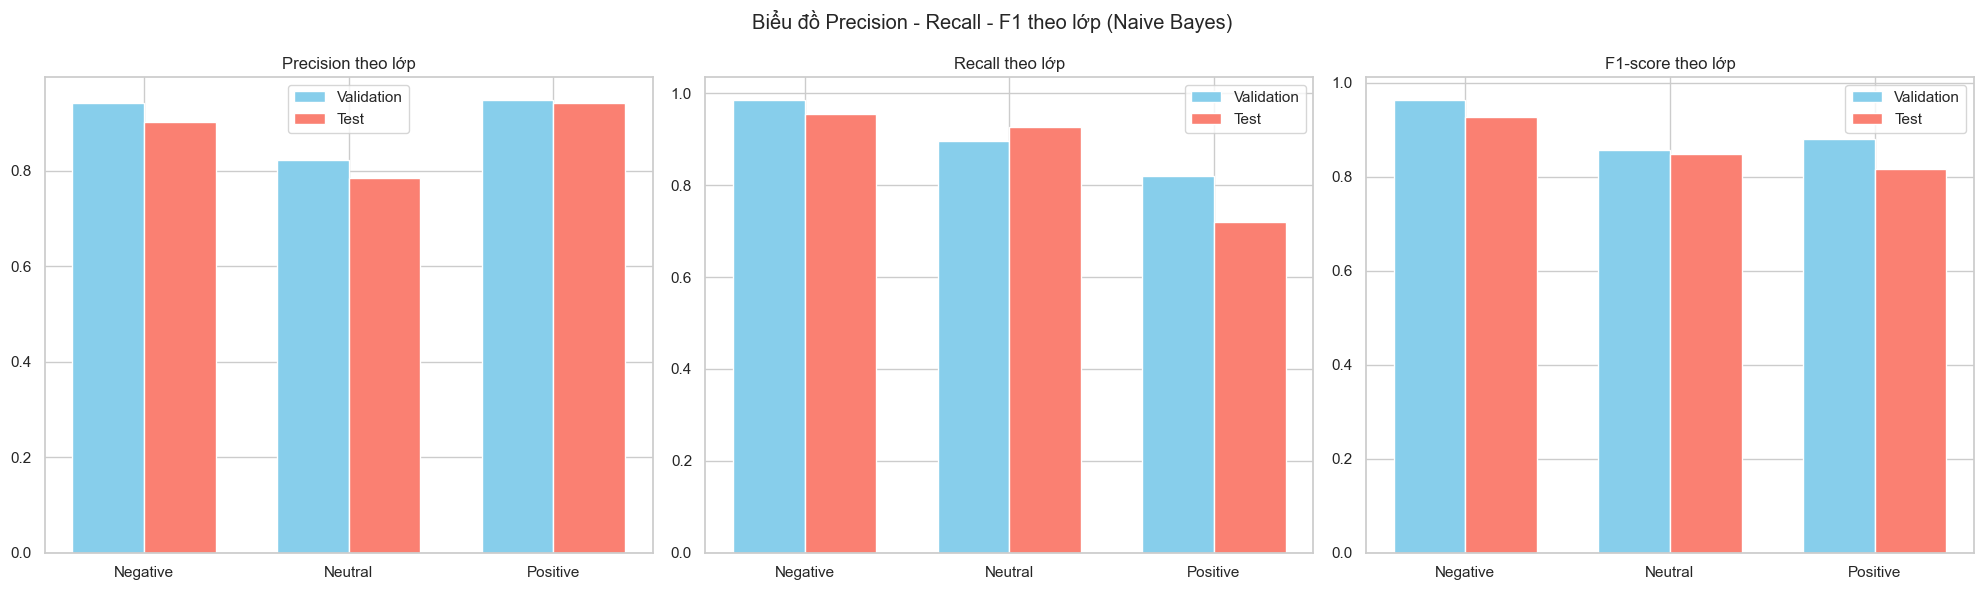

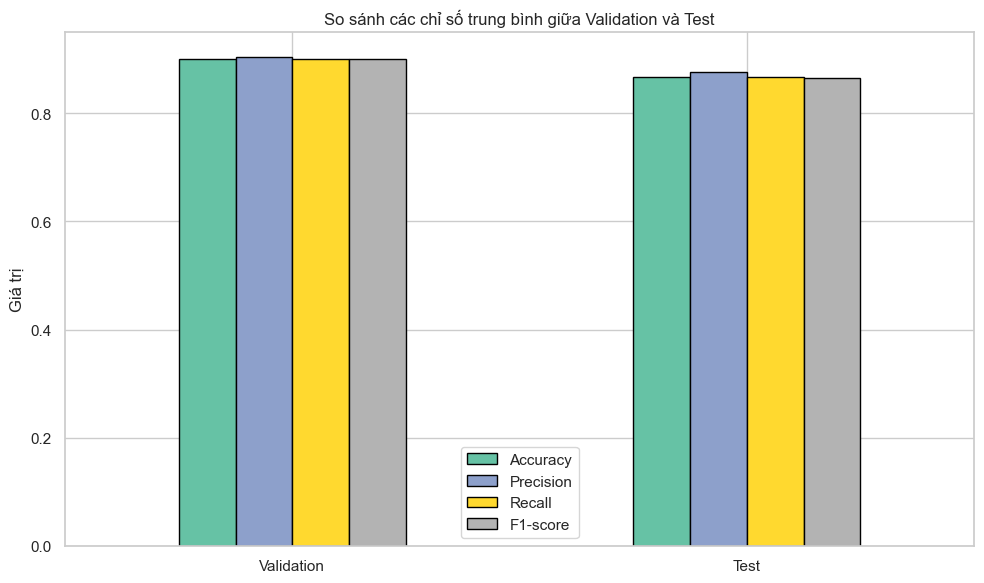

In [37]:
save_dir = 'train_archive/Naive_Bayes'
os.makedirs(save_dir, exist_ok=True)
# 3. Chia dữ liệu train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)

# 4. Train Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. Đánh giá
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("\nKết quả trên tập validation:")
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

print("\nKết quả trên tập test:")
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# 6. Vẽ confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn Naive Bayes')
plt.tight_layout()
plt.savefig(f'{save_dir}/confusion_matrix.png')


# 7. Vẽ biểu đồ theo lớp
metrics_val = precision_recall_fscore_support(y_val, y_val_pred, average=None, labels=range(len(label_encoder.classes_)))
metrics_test = precision_recall_fscore_support(y_test, y_test_pred, average=None, labels=range(len(label_encoder.classes_)))

labels = label_encoder.classes_
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].bar(x - width/2, metrics_val[0], width, label='Validation', color='skyblue')
ax[0].bar(x + width/2, metrics_test[0], width, label='Test', color='salmon')
ax[0].set_title('Precision theo lớp')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].grid(True)

ax[1].bar(x - width/2, metrics_val[1], width, label='Validation', color='skyblue')
ax[1].bar(x + width/2, metrics_test[1], width, label='Test', color='salmon')
ax[1].set_title('Recall theo lớp')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
ax[1].grid(True)

ax[2].bar(x - width/2, metrics_val[2], width, label='Validation', color='skyblue')
ax[2].bar(x + width/2, metrics_test[2], width, label='Test', color='salmon')
ax[2].set_title('F1-score theo lớp')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()
ax[2].grid(True)

plt.suptitle('Biểu đồ Precision - Recall - F1 theo lớp (Naive Bayes)')
plt.tight_layout()
plt.savefig(f'{save_dir}/metrics_by_class.png')


# 8. Biểu đồ tổng hợp
avg_metrics = {
    'Accuracy': [accuracy_score(y_val, y_val_pred), accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_val, y_val_pred, average='macro'), precision_score(y_test, y_test_pred, average='macro')],
    'Recall': [recall_score(y_val, y_val_pred, average='macro'), recall_score(y_test, y_test_pred, average='macro')],
    'F1-score': [f1_score(y_val, y_val_pred, average='macro'), f1_score(y_test, y_test_pred, average='macro')]
}

metrics_df = pd.DataFrame(avg_metrics, index=['Validation', 'Test'])
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title("So sánh các chỉ số trung bình giữa Validation và Test")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{save_dir}/avg_metrics_comparison.png')


# 9. Lưu model và các thành phần
pickle.dump(model, open(f'{save_dir}/sentiment.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open(f'{save_dir}/vectorizer.pkl', 'wb'))
pickle.dump(label_encoder, open(f'{save_dir}/label_encoder.pkl', 'wb'))


# Kiểm thử mô hình

In [38]:
# Danh sách tên mô hình hợp lệ
AVAILABLE_MODELS = {
    'logistic_regression': 'Logistic_Regression',
    'naive_bayes': 'Naive_Bayes',
    'svm': 'Support_Vector_Machine',
    'xgboost': 'XGBoost'
}

# Hàm tiền xử lý văn bản
def preprocess_text(text, remove_stopwords=True):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\S+@\S+", '', text)
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Hàm tải mô hình, vectorizer và encoder theo tên
def load_model_components(model_key):
    if model_key not in AVAILABLE_MODELS:
        raise ValueError(f"Model '{model_key}' không tồn tại. Chọn một trong: {list(AVAILABLE_MODELS.keys())}")
    
    model_path = f"train_archive/{AVAILABLE_MODELS[model_key]}"
    model = joblib.load(f"{model_path}/sentiment.pkl")
    vectorizer = joblib.load(f"{model_path}/vectorizer.pkl")
    encoder = joblib.load(f"{model_path}/label_encoder.pkl")
    return model, vectorizer, encoder

# Hàm dự đoán cảm xúc dùng chung
def predict_sentiment(text, model_key='svm'):
    # Tiền xử lý
    text = preprocess_text(text)

    # Load các thành phần mô hình
    model, vectorizer, encoder = load_model_components(model_key)

    # Vector hóa văn bản
    features = vectorizer.transform([text])

    # Dự đoán xác suất nếu model hỗ trợ
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(features)[0]
    else:
        # Nếu không có predict_proba, dùng decision_function (áp dụng cho SVM) → chuẩn hóa thành xác suất tương đối
        decision_scores = model.decision_function(features)
        if decision_scores.ndim == 1:
            decision_scores = np.vstack([-decision_scores, decision_scores]).T
        probabilities = np.exp(decision_scores) / np.sum(np.exp(decision_scores), axis=1)

    # Dự đoán lớp cảm xúc
    prediction = np.argmax(probabilities)
    predicted_label = encoder.inverse_transform([prediction])[0]

    # Tạo dictionary xác suất
    prob_dict = {
        encoder.inverse_transform([i])[0]: round(prob * 100, 2)
        for i, prob in enumerate(probabilities)
    }

    return {
        'sentiment': predicted_label,
        'probabilities': prob_dict
    }

# ======== Test ========
sample_texts = [
    # Positive
    "The customer service here is truly excellent, the staff are very helpful and friendly.",
    "I've been using this product for 6 months and I'm completely satisfied. Totally worth the money.",
    "The app runs smoothly, has a beautiful interface, and is very easy to use. 10 out of 10!"     ,

    # Negative
    "I can't believe how bad this product is, I'm extremely disappointed.",
    "The app keeps crashing and it's basically unusable.",
    "Delivery was almost a week late and nobody answered the customer service hotline.",

    # Neutral
    "The product matches the description, packaging was okay, nothing special.",
    "Attending a virtual conference on AI.",
    "Confusion surrounds me as I navigate through life's choices.",
]

# Chọn model_key: 'svm', 'logistic_regression', 'naive_bayes', 'xgboost'
for model_key in AVAILABLE_MODELS:
    print(f"\n==== Kết quả với mô hình: {AVAILABLE_MODELS[model_key]} ====\n")
    
    # Xử lý mỗi lần 3 câu
    for i in range(0, len(sample_texts), 3):
        # Lấy nhóm 3 câu từ vị trí i đến i+3 (hoặc đến hết nếu không đủ 3 câu)
        group_texts = sample_texts[i:i+3]
        
        # Dự đoán và hiển thị cho mỗi câu trong nhóm
        for text in group_texts:
            result = predict_sentiment(text, model_key=model_key)
            sentiment = result['sentiment']
            probability = result['probabilities'][sentiment]
            print(f'"{text}" => {sentiment}: {probability:.2f}%')
        
        # Ngắt dòng sau mỗi nhóm 3 câu (trừ nhóm cuối)
        if i + 3 < len(sample_texts):
            print()  # In một dòng trống



==== Kết quả với mô hình: Logistic_Regression ====

"The customer service here is truly excellent, the staff are very helpful and friendly." => Positive: 47.25%
"I've been using this product for 6 months and I'm completely satisfied. Totally worth the money." => Positive: 47.25%
"The app runs smoothly, has a beautiful interface, and is very easy to use. 10 out of 10!" => Positive: 67.87%

"I can't believe how bad this product is, I'm extremely disappointed." => Negative: 71.55%
"The app keeps crashing and it's basically unusable." => Positive: 47.25%
"Delivery was almost a week late and nobody answered the customer service hotline." => Positive: 47.25%

"The product matches the description, packaging was okay, nothing special." => Positive: 47.25%
"Attending a virtual conference on AI." => Neutral: 59.41%
"Confusion surrounds me as I navigate through life's choices." => Neutral: 85.81%

==== Kết quả với mô hình: Naive_Bayes ====

"The customer service here is truly excellent, the staf